In [95]:
# Importing neccessary modules/functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warning modules to ignore warnings given by python
import warnings
warnings.filterwarnings('ignore')

# Time series machine learning modules
from statsmodels.tsa.seasonal import seasonal_decompose # checking seasonality
from statsmodels.tsa.stattools import adfuller # to check stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # to get q and p values respectively
from scipy.stats import boxcox # to decompose using boxcox transformation
from statsmodels.tsa.arima.model import ARIMA # Arima model
from statsmodels.tsa.statespace.sarimax import SARIMAX # Sarima model
import pmdarima as pmd

# Importing metrics score modules
from sklearn.metrics import mean_squared_error

In [2]:
# Read dataset using read_csv fuction

walmart_df = pd.read_csv(r"D:\INTELLIPAAT\Capstone Proj\Walmart DataSet\Walmart DataSet.csv")
walmart_df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

# Exploratory Data Analysis

In [3]:
# Getting the size of the dataset
walmart_df.shape

(6435, 8)

In [4]:
# Checking for null values in dataset
walmart_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Checking for duplicates
walmart_df.duplicated().sum()

0

In [6]:
# Checking for data type
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Changing the data type of date column and resetting it to index

walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format = '%d-%m-%Y')
walmart_df.sort_values(by = ['Date','Store'],inplace=True)
walmart_df.set_index('Date',inplace=True)

In [8]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


### You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

#### Q1.
#### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Looking at other column correlation with Weekly_Sales, Unemployment has significant relation with sales column


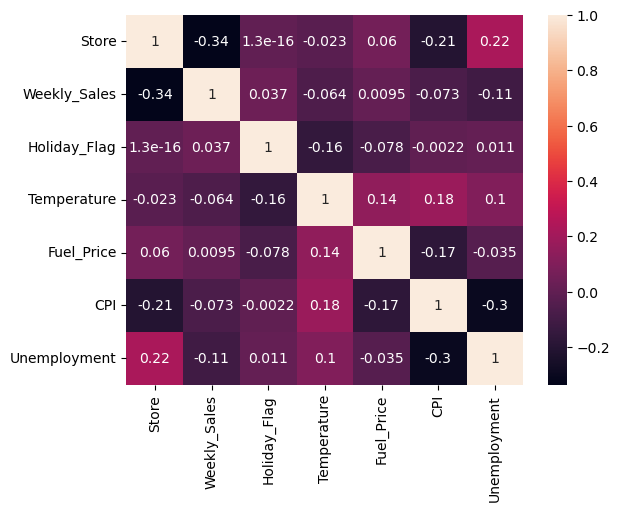

In [9]:
# Checking correlation between Weekly Slaes and Unemployment Column
sns.heatmap(walmart_df.corr(numeric_only=True), annot = True)
plt.plot()

print('Looking at other column correlation with Weekly_Sales, Unemployment has significant relation with sales column')

In [10]:
# Checking for max unemployment, min sales and Min Unemployment, max sales.
walmart_df[(walmart_df['Unemployment'] == walmart_df['Unemployment'].max())].sort_values(by='Weekly_Sales')

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-12-31     38     303908.81             1        45.64       3.148   
2010-12-17     38     334441.15             0        52.77       3.236   
2010-10-15     38     337743.26             0        75.00       2.976   
2010-10-22     38     339042.18             0        68.85       3.014   
2010-11-12     38     340147.20             0        57.79       3.130   
2010-10-29     38     341219.63             0        61.09       3.016   
2010-11-19     38     348593.99             0        58.18       3.161   
2010-10-08     38     351271.36             0        71.82       3.013   
2010-12-03     38     351925.36             0        43.33       3.041   
2010-12-10     38     355965.23             0        50.01       3.203   
2010-10-01     38     360256.58             0        85.20       3.001   
2010-11-26     38     360857.98             1        47.66       3.162   
2010-12-24     38     369106.72             0        52.02       3.236   
2010-11-05     38     380870.09             0        65.49       3.129   
2010-10-01     12     850936.26             0        85.20       3.001   
2010-10-22     12     857883.46             0        68.85       3.014   
2010-10-15     12     862419.84             0        75.00       2.976   
2010-12-31     12     891736.91             1        45.64       3.148   
2010-11-19     12     894493.70             0        58.18       3.161   
2010-10-08     12     918335.68             0        71.82       3.013   
2010-11-05     12     929690.71             0        65.49       3.129   
2010-11-12     12     942475.24             0        57.79       3.130   
2010-10-29     12     955294.70             0        61.09       3.016   
2010-12-03     12    1069533.17             0        43.33       3.041   
2010-12-31     28    1090558.57             1        45.64       3.148   
2010-10-22     28    1120619.32             0        68.85       3.014   
2010-12-10     12    1121934.15             0        50.01       3.203   
2010-10-15     28    1158062.99             0        75.00       2.976   
2010-11-19     28    1179315.72             0        58.18       3.161   
2010-10-01     28    1203080.41             0        85.20       3.001   
2010-10-29     28    1231688.48             0        61.09       3.016   
2010-11-12     28    1266460.45             0        57.79       3.130   
2010-12-17     12    1295605.35             0        52.77       3.236   
2010-10-08     28    1334571.87             0        71.82       3.013   
2010-12-03     28    1447916.29             0        43.33       3.041   
2010-12-10     28    1466164.49             0        50.01       3.203   
2010-11-05     28    1501663.26             0        65.49       3.129   
2010-12-17     28    1510443.62             0        52.77       3.236   
2010-11-26     12    1601377.41             1        47.66       3.162   
2010-12-24     12    1768249.89             0        52.02       3.236   
2010-11-26     28    1937033.50             1        47.66       3.162   
2010-12-24     28    2026026.39             0        52.02       3.236   

                   CPI  Unemployment  
Date                                  
2010-12-31  127.087677        14.313  
2010-12-17  126.879484        14.313  
2010-10-15  126.326677        14.313  
2010-10-22  126.381548        14.313  
2010-11-12  126.546161        14.313  
2010-10-29  126.436419        14.313  
2010-11-19  126.607200        14.313  
2010-10-08  126.279167        14.313  
2010-12-03  126.731333        14.313  
2010-12-10  126.793400        14.313  
2010-10-01  126.234600        14.313  
2010-11-26  126.669267        14.313  
2010-12-24  126.983581        14.313  
2010-11-05  126.491290        14.313  
2010-10-01  126.234600        14.313  
2010-10-22  126.381548        14.313  
2010-10-15  126.326677        14.313  
2010-12-31  12

In [11]:
walmart_df[(walmart_df['Unemployment'] == walmart_df['Unemployment'].min())].sort_values(by='Weekly_Sales', ascending=False)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-10-05      4    2209835.43             0        63.07       3.620   
2012-10-26      4    2149594.46             0        63.64       3.514   
2012-10-12      4    2133026.07             0        57.11       3.603   
2012-10-19      4    2097266.85             0        64.46       3.610   

                   CPI  Unemployment  
Date                                  
2012-10-05  131.075667         3.879  
2012-10-26  131.193097         3.879  
2012-10-12  131.108333         3.879  
2012-10-19  131.149968         3.879

In [12]:
correlation_columns = walmart_df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr()

In [13]:
correlation_columns

Weekly_Sales  Unemployment
Store                                         
1     Weekly_Sales      1.000000     -0.097955
      Unemployment     -0.097955      1.000000
2     Weekly_Sales      1.000000      0.066325
      Unemployment      0.066325      1.000000
3     Weekly_Sales      1.000000     -0.230413
...                          ...           ...
43    Unemployment     -0.201954      1.000000
44    Weekly_Sales      1.000000     -0.780076
      Unemployment     -0.780076      1.000000
45    Weekly_Sales      1.000000     -0.004041
      Unemployment     -0.004041      1.000000

[90 rows x 2 columns]

In [14]:
correlation_columns = correlation_columns.iloc[0::2, -1].reset_index(level=1, drop=True)
correlation_columns

Store
1    -0.097955
2     0.066325
3    -0.230413
4    -0.337015
5    -0.207043
6     0.044251
7    -0.165382
8    -0.052580
9    -0.191534
10    0.131908
11   -0.020339
12   -0.009286
13   -0.171633
14    0.210786
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.095341
21    0.218367
22    0.039043
23   -0.077169
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.014275
28    0.136671
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.785290
39   -0.384681
40   -0.112528
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
Name: Unemployment, dtype: float64

<Axes: xlabel='Store'>

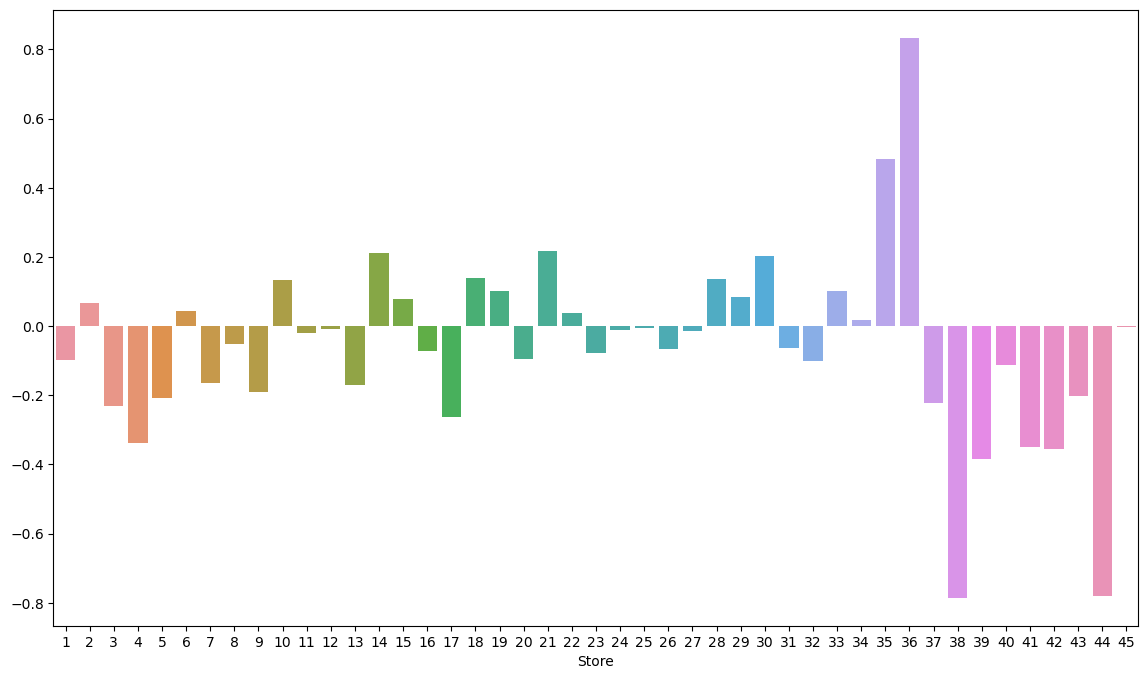

In [15]:
# Plotting correlation values for each store 
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_columns.index, y=correlation_columns.values)

### From the above plot we can see the two most affected store through correlation is store no. 36 in positive direction and store no. 38 in negative direction indicating positive and negative weekly sales respectively. 

### Now let's check the individual store graph to support above analysis.

In [16]:
walmart_38 = walmart_df[walmart_df['Store'] == 38]
walmart_36 = walmart_df[walmart_df['Store'] == 36]

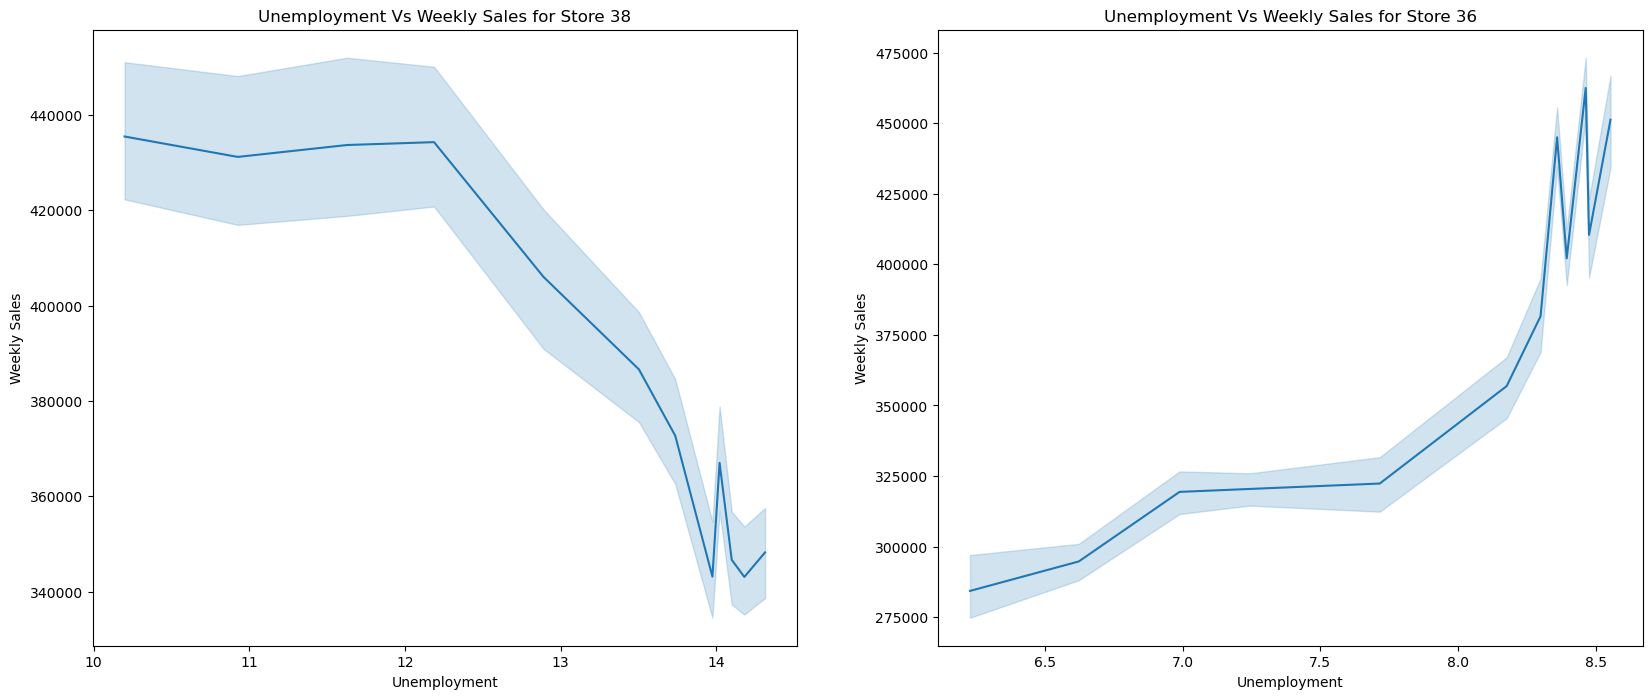

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.lineplot(x = walmart_38['Unemployment'],y = walmart_38['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Unemployment Vs Weekly Sales for Store 38')


plt.subplot(1,2,2)
sns.lineplot(x = walmart_36['Unemployment'],y = walmart_36['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Unemployment Vs Weekly Sales for Store 36')

plt.show()

#### As we can clearly see here plot of Weekly_sales vs Unemployment for both the store, it is decreasing and increasing drastically over the period of years.
#### So, the most affected store from uneployment in terms of weekly sales are 38 and 36
#### Also Store no. 44 and 35 can be seen as affected from the individual store correlation plot.

#### Q.1
#### b. If the weekly sales show a seasonal trend, when and what could be the reason?

A time series is thought to consist of 4 components including level, trend, seasonality, and noise.

These components are defined as follows:

#### Level: The Mean value in the series.

#### Trend: The increasing or decreasing value in the series.

#### Seasonality: The repeating short-term cycle in the series.

#### Noise: Residual or random variation in the series.

In [18]:
# import seasonal_decompose that will be used for finding seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
# To get sum of all stores weekly sales values
weekly_sales = pd.DataFrame(walmart_df.groupby(pd.Grouper(freq='W')).sum()['Weekly_Sales'])
weekly_sales

Weekly_Sales
Date                    
2010-02-07   49750740.50
2010-02-14   48336677.63
2010-02-21   48276993.78
2010-02-28   43968571.13
2010-03-07   46871470.30
...                  ...
2012-09-30   43734899.40
2012-10-07   47566639.31
2012-10-14   46128514.25
2012-10-21   45122410.57
2012-10-28   45544116.29

[143 rows x 1 columns]

In [20]:
# Let's decmpose data using period as 52 since we have 52 weeks in a year
results = seasonal_decompose(weekly_sales, model='additive', period=52)

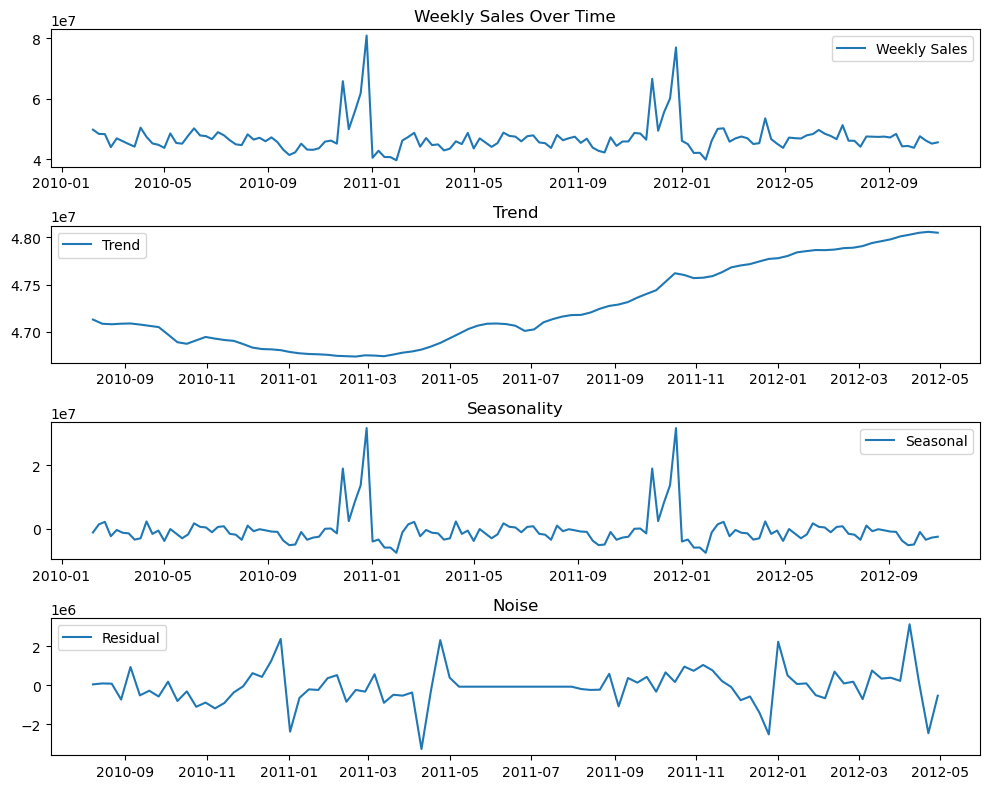

Through looking at Weekly Sales over time graph and Seasonal Component we can see clear spikes in Januray sales for year 2011, 2012 and so on which depicts seasonality in month of year.
Since, January is a festival/holiday season in US sales is higher


In [21]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(4,1,1)
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.legend()

plt.subplot(4,1,2)
plt.plot(results.trend, label='Trend')
plt.title('Trend')
plt.legend()

plt.subplot(4,1,3)
plt.plot(results.seasonal, label='Seasonal')
plt.title('Seasonality')
plt.legend()

plt.subplot(4,1,4)
plt.plot(results.resid, label='Residual')
plt.title('Noise')
plt.legend()

plt.tight_layout()
plt.show()


print('Through looking at Weekly Sales over time graph and Seasonal Component we can see clear spikes in Januray sales for year 2011, 2012 and so on which depicts seasonality in month of year.\nSince, January is a festival/holiday season in US sales is higher')

#### Q 1 C. Does temperature affect the weekly sales in any manner?

Text(0.5, 1.0, 'Heatmap')

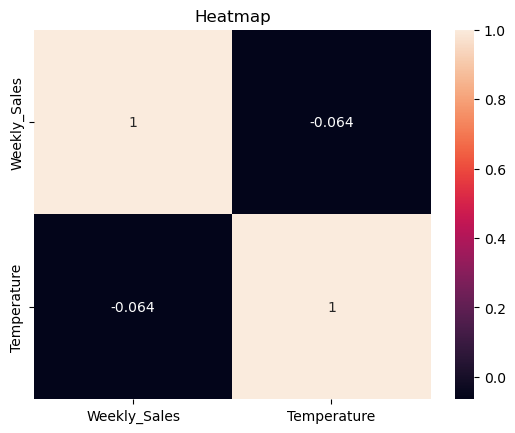

In [22]:
# Heatmap plot

sns.heatmap(walmart_df[['Weekly_Sales','Temperature']].corr(),annot=True)
plt.title('Heatmap')

#### Looking at the heatmap there is a significant correlation. But let's plot the graph and double check

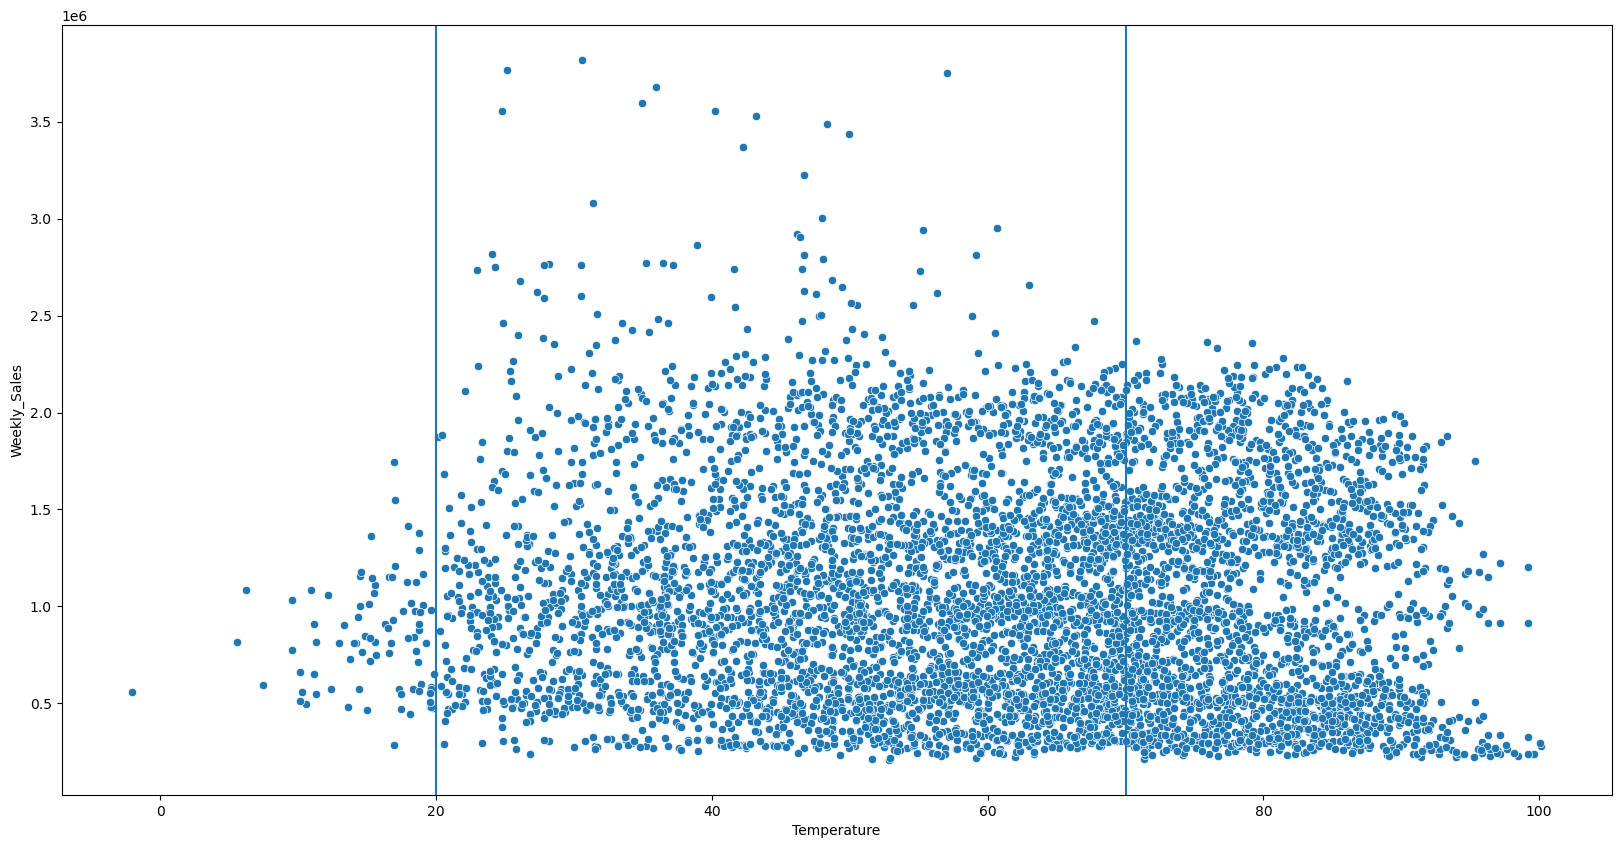

In [23]:
#Scatter Plot for Temperature vs Weekly Sales

plt.figure(figsize=(20,10))
sns.scatterplot(data = walmart_df, x='Temperature', y='Weekly_Sales')
plt.axvline(x=20)
plt.axvline(x=70)

<Figure size 1000x800 with 0 Axes>

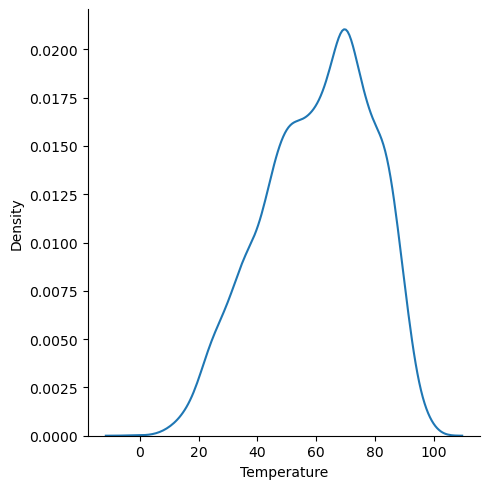

In [24]:
# PLotting Distribution plot for temperature 

plt.figure(figsize=(10,8))
sns.displot(data = walmart_df, x='Temperature',kind='kde')

#### We can see at extreme temperatures either high or low temp, sales is very less as compared to normal temperatures between 20 to 60
#### So Temperatures has an effect in weekly sales

#### Q 1 D. How is the Consumer Price index affecting the weekly sales of various stores? 

<Axes: >

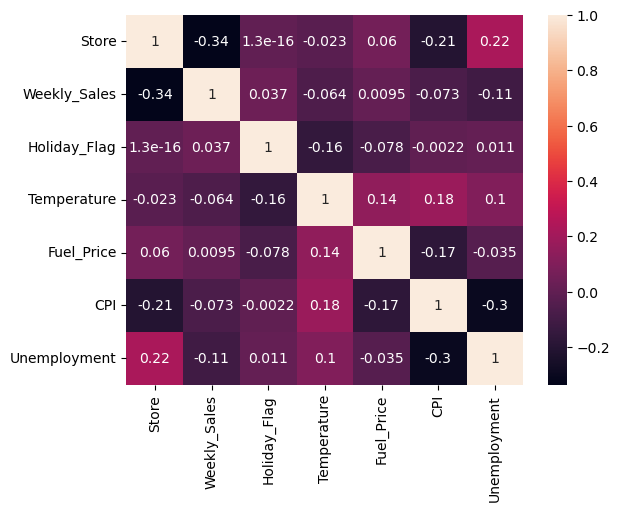

In [25]:
# plotting heatmap
sns.heatmap(walmart_df.corr(),annot=True)

#### The correlation value lies almost in middle so there seems to be no direct impact of CPI on Weekly Sales but let's plot a scatter plot and confirm

Text(0, 0.5, 'Weekly Sales')

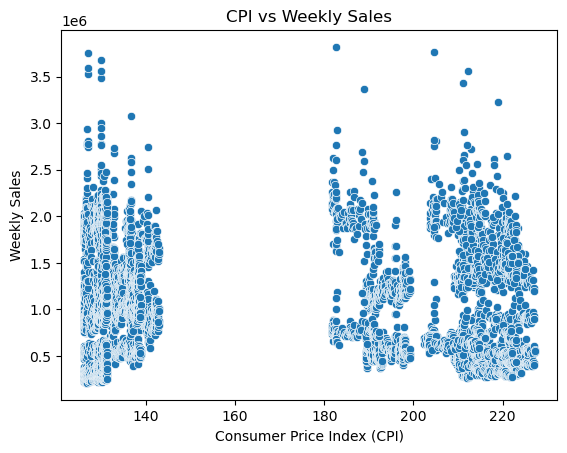

In [26]:
#Plotting scatter plot for CPI vs Weekly Sales

sns.scatterplot(x = walmart_df['CPI'], y = walmart_df['Weekly_Sales'])
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')

#### We can see 3 separate clusters around different ranges of CPI. 
#### There seems to be no direct relation/correlation between the change in CPI and weekly sales. Although we can see high sales in high CPI range

#### Q 1 E. Top performing stores according to the historical data.


In [27]:
#Getting top 5 store based on sum of sales for entire historical data per store
top_5_store_sum_of_weekly_sales = walmart_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
top_5_store_sum_of_weekly_sales = pd.DataFrame(top_5_store_sum_of_weekly_sales)
top_5_store_sum_of_weekly_sales

Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08

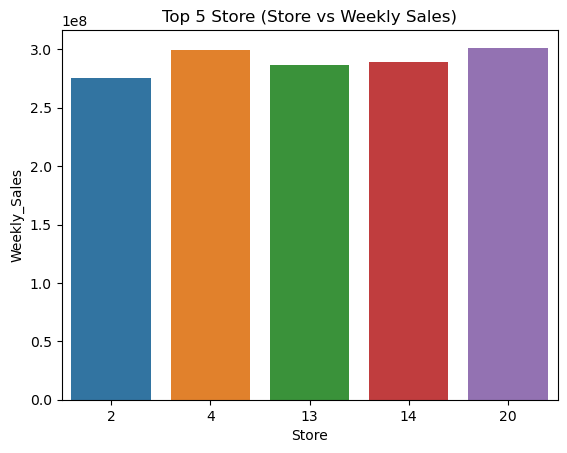

In [28]:
# Plotting top 5 Store in barplot

sns.barplot(data = top_5_store_sum_of_weekly_sales, x=top_5_store_sum_of_weekly_sales.index, y=top_5_store_sum_of_weekly_sales['Weekly_Sales'])
plt.title('Top 5 Store (Store vs Weekly Sales)')
plt.show()

#### Top 5 store according to sum of gross weekly sales are #20, #4, #14, #13, #2 order wise

#### Q 1 F. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [29]:
#Getting worst 5 store based on sum of sales for entire historical data per store
worst_5_store_sum_of_weekly_sales = walmart_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).head(5)
worst_5_store_sum_of_weekly_sales = pd.DataFrame(worst_5_store_sum_of_weekly_sales)
worst_5_store_sum_of_weekly_sales

Weekly_Sales
Store              
33      37160221.96
44      43293087.84
5       45475688.90
36      53412214.97
38      55159626.42

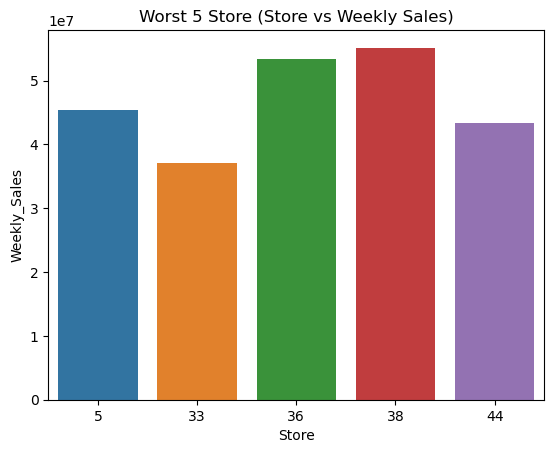

In [30]:
# Plotting worst 5 Store in barplot

sns.barplot(data = worst_5_store_sum_of_weekly_sales, x=worst_5_store_sum_of_weekly_sales.index, y=worst_5_store_sum_of_weekly_sales['Weekly_Sales'])
plt.title('Worst 5 Store (Store vs Weekly Sales)')
plt.show()

#### Worst 5 store according to sum of gross weekly sales are #33, #44, #5, #36, #38|

In [31]:
# How significant is the difference between the highest and lowest performing stores.
top_store_20 = top_5_store_sum_of_weekly_sales.head(1)
worst_store_33 = worst_5_store_sum_of_weekly_sales.head(1)

Weekly_sales_difference = top_store_20.values - worst_store_33.values
print(f'Difference between top performing and worst performing store is ${Weekly_sales_difference[0][0]}') 

Difference between top performing and worst performing store is $264237570.49999997


In [32]:
top_store_20

Weekly_Sales
Store              
20     3.013978e+08

In [33]:
worst_store_33

Weekly_Sales
Store              
33      37160221.96

In [34]:
# Combine top and worst store sum of sales record.
top_and_worst_store = pd.DataFrame(np.vstack((top_store_20, worst_store_33)),index=[20,33],columns=['Sum of Sales'])

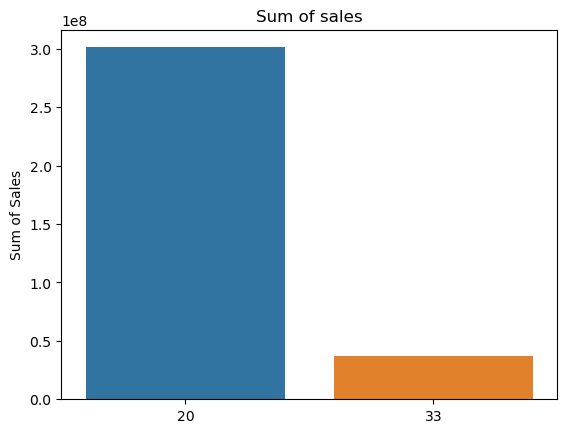

In [35]:
#Potting barplot for top and worst store sum of sales
sns.barplot(data = top_and_worst_store,x=top_and_worst_store.index, y=top_and_worst_store['Sum of Sales'])
plt.title('Sum of sales')
plt.show()

### Q2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks. 

In [38]:
#To keep only required colums that is date and Weekly Sales
walmart_df_req_col = walmart_df[['Store','Weekly_Sales']]
walmart_df_req_col

Store  Weekly_Sales
Date                           
2010-02-05      1    1643690.90
2010-02-05      2    2136989.46
2010-02-05      3     461622.22
2010-02-05      4    2135143.87
2010-02-05      5     317173.10
...           ...           ...
2012-10-26     41    1316542.59
2012-10-26     42     514756.08
2012-10-26     43     587603.55
2012-10-26     44     361067.07
2012-10-26     45     760281.43

[6435 rows x 2 columns]

#### Let's try to perform forecasting for store 1 and build Arima, Sarima model. If Sarima model is proven more efficient then we will generalise SARIMA for all stores since we have seasonality in the data.

In [51]:
store_1 = walmart_df_req_col[walmart_df_req_col['Store'] == 1]['Weekly_Sales']
store_1 = pd.DataFrame(store_1)
store_1

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[143 rows x 1 columns]

In [58]:
# Perfoming Adfuller test
results = adfuller(store_1)
p = results[1]
if p < 0.05:
    print('Data is Stationary and no transformation is required')
else:
    print('Data is not stationary')

Data is Stationary and no transformation is required


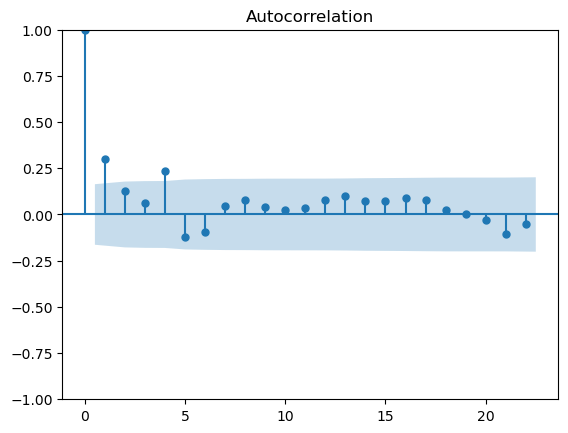

In [61]:
plot_acf(x = store_1);

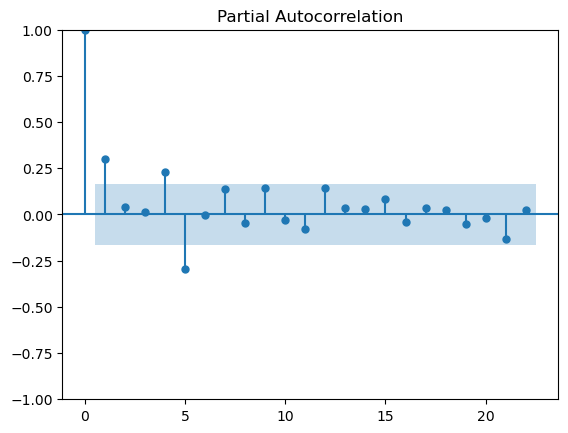

In [63]:
plot_pacf(x = store_1);

#### We got acf values as (1,4) and pacf as (1,4,5). So, we will try all combination of p,d,q where d = 0.

In [82]:
store_1_train = store_1[0:115]
store_1_test = store_1[115:]

Weekly_Sales
Date                    
2012-04-20    1521577.87
2012-04-27    1468928.37
2012-05-04    1684519.99
2012-05-11    1611096.05
2012-05-18    1595901.87
2012-05-25    1555444.55
2012-06-01    1624477.58
2012-06-08    1697230.96
2012-06-15    1630607.00
2012-06-22    1527845.81
2012-06-29    1540421.49
2012-07-06    1769854.16
2012-07-13    1527014.04
2012-07-20    1497954.76
2012-07-27    1439123.71
2012-08-03    1631135.79
2012-08-10    1592409.97
2012-08-17    1597868.05
2012-08-24    1494122.38
2012-08-31    1582083.40
2012-09-07    1661767.33
2012-09-14    1517428.87
2012-09-21    1506126.06
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

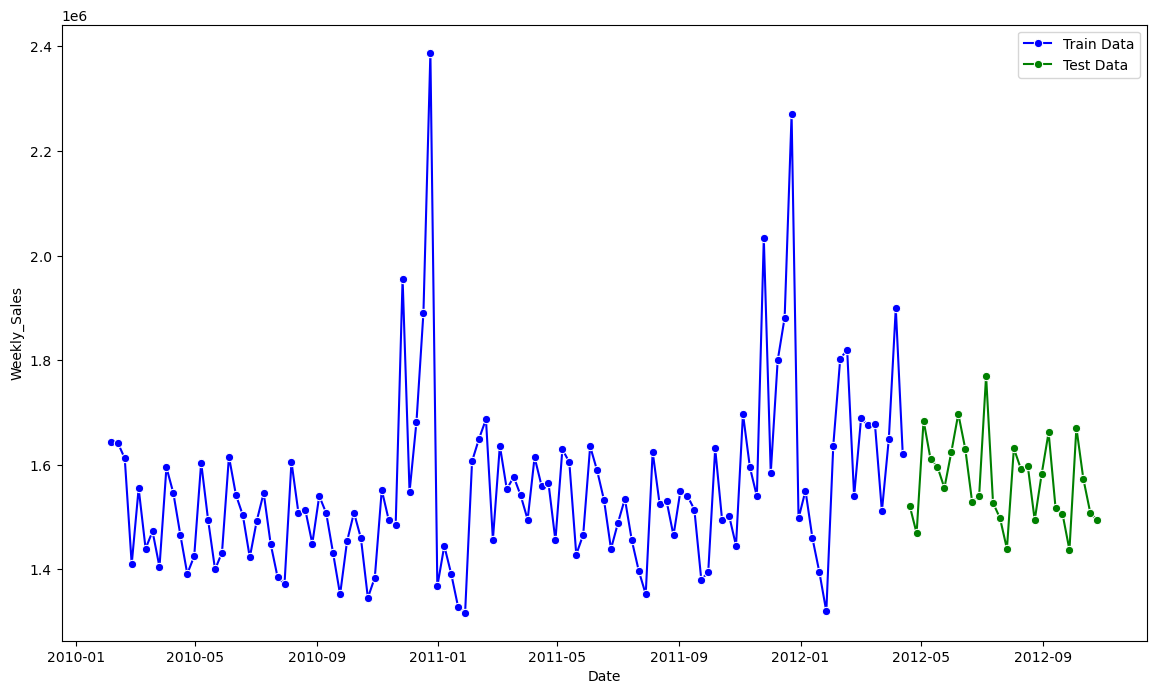

In [84]:
plt.figure(figsize=(14,8))
sns.lineplot(data = store_1_train,x=store_1_train.index,y='Weekly_Sales',color='blue',marker='o',label = 'Train Data')
sns.lineplot(data = store_1_test,x=store_1_test.index,y='Weekly_Sales',color='green',marker='o',label = 'Test Data')

In [111]:
arima = ARIMA(store_1, order=(1,0,4))
arima = arima.fit()
arima_pred = arima.predict(start=115,end = len(store_1)-1)
arima_pred

2012-04-20    1.597230e+06
2012-04-27    1.511879e+06
2012-05-04    1.647596e+06
2012-05-11    1.517975e+06
2012-05-18    1.578701e+06
2012-05-25    1.568095e+06
2012-06-01    1.566416e+06
2012-06-08    1.610924e+06
2012-06-15    1.607530e+06
2012-06-22    1.576855e+06
2012-06-29    1.560830e+06
2012-07-06    1.566415e+06
2012-07-13    1.641251e+06
2012-07-20    1.537267e+06
2012-07-27    1.496656e+06
2012-08-03    1.611194e+06
2012-08-10    1.495507e+06
2012-08-17    1.592885e+06
2012-08-24    1.557024e+06
2012-08-31    1.536897e+06
2012-09-07    1.596612e+06
2012-09-14    1.593043e+06
2012-09-21    1.512478e+06
2012-09-28    1.552986e+06
2012-10-05    1.534051e+06
2012-10-12    1.550373e+06
2012-10-19    1.603760e+06
2012-10-26    1.467923e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

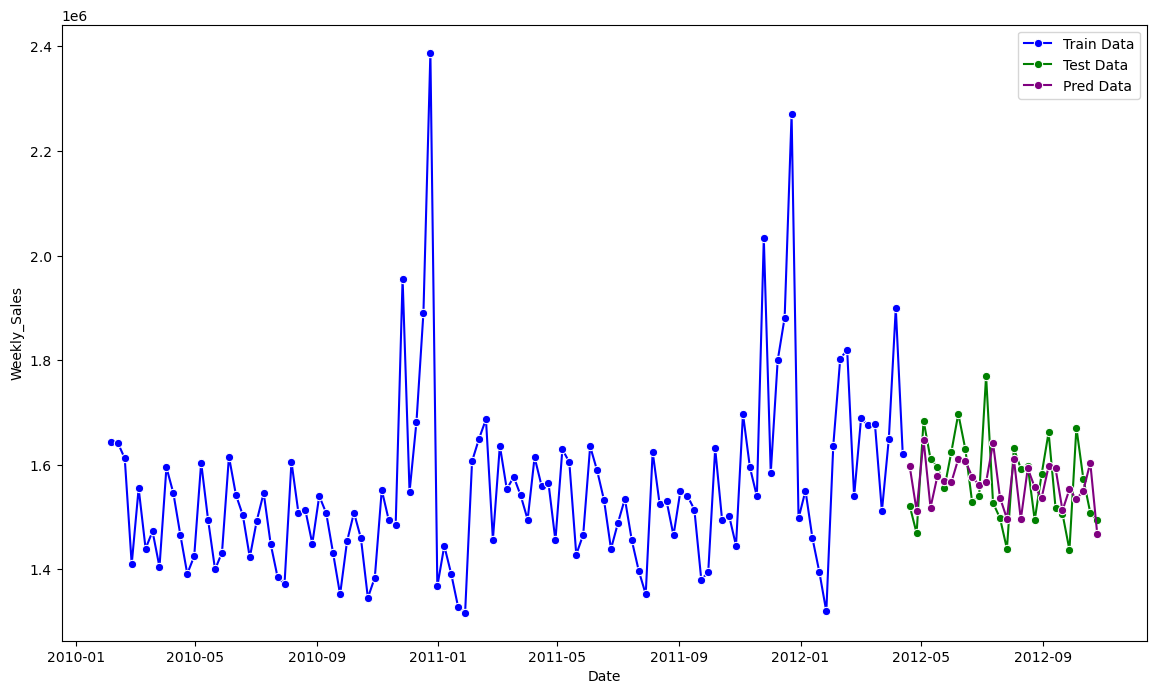

In [112]:
plt.figure(figsize=(14,8))
sns.lineplot(data = store_1_train,x=store_1_train.index,y='Weekly_Sales',color='blue',marker='o',label = 'Train Data')
sns.lineplot(data = store_1_test,x=store_1_test.index,y='Weekly_Sales',color='green',marker='o',label = 'Test Data')
sns.lineplot(data = arima_pred,x=arima_pred.index,y=arima_pred.values,color='purple',marker='o',label = 'Pred Data')
plt.show()

In [113]:
# Summarize the performance of the model on the test data using RMSE
rmse = np.sqrt(mean_squared_error(y_true = store_1_test['Weekly_Sales'], y_pred = arima_pred.values))
rmse = np.round(rmse, 2)
rmse

75547.29

In [132]:
#Making Sarima Model with period 12
sarima = SARIMAX(store_1, order=(1,0,4), seasonal_order=(1,0,4,12))
sarima = sarima.fit()
sarima_pred = sarima.predict(start=115, end = len(store_1)-1)
sarima_pred

2012-04-20    1.492044e+06
2012-04-27    1.519946e+06
2012-05-04    1.661177e+06
2012-05-11    1.618449e+06
2012-05-18    1.613632e+06
2012-05-25    1.568073e+06
2012-06-01    1.590610e+06
2012-06-08    1.606308e+06
2012-06-15    1.628066e+06
2012-06-22    1.580274e+06
2012-06-29    1.532966e+06
2012-07-06    1.644767e+06
2012-07-13    1.686271e+06
2012-07-20    1.530153e+06
2012-07-27    1.529838e+06
2012-08-03    1.597885e+06
2012-08-10    1.616854e+06
2012-08-17    1.596781e+06
2012-08-24    1.536331e+06
2012-08-31    1.519161e+06
2012-09-07    1.651997e+06
2012-09-14    1.613276e+06
2012-09-21    1.524179e+06
2012-09-28    1.549832e+06
2012-10-05    1.607852e+06
2012-10-12    1.617501e+06
2012-10-19    1.566105e+06
2012-10-26    1.590024e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

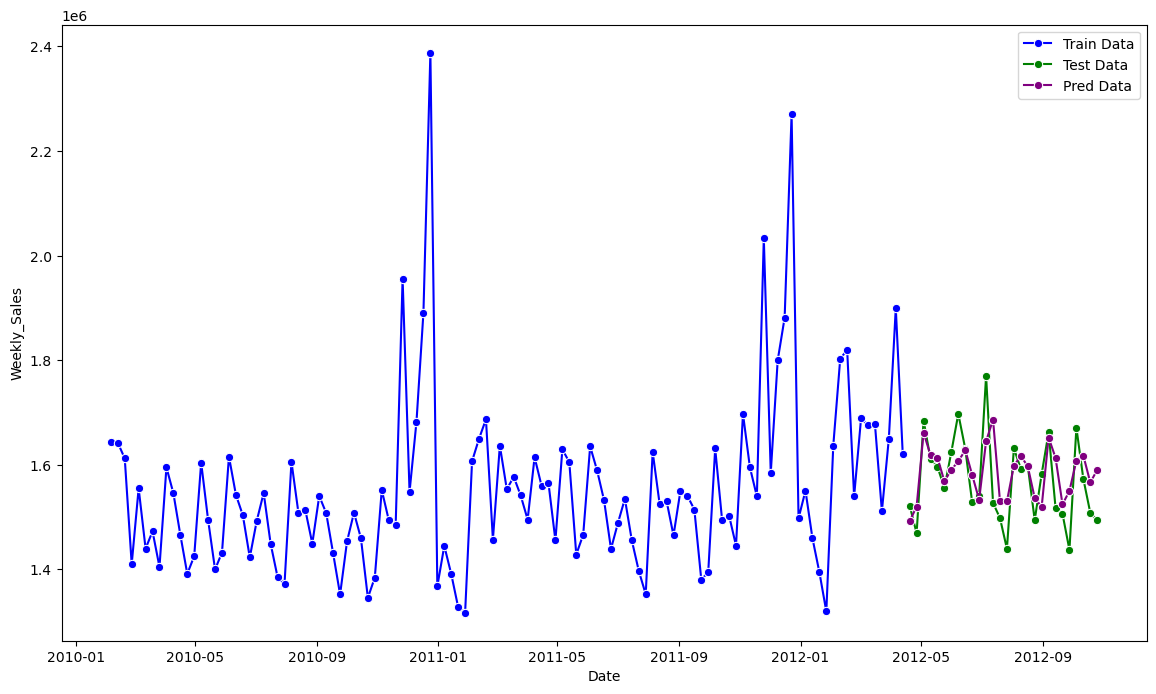

In [133]:
# Plotting Train, Test and predict values to overlap with the test data
plt.figure(figsize=(14,8))
sns.lineplot(data = store_1_train,x=store_1_train.index,y='Weekly_Sales',color='blue',marker='o',label = 'Train Data')
sns.lineplot(data = store_1_test,x=store_1_test.index,y='Weekly_Sales',color='green',marker='o',label = 'Test Data')
sns.lineplot(data = sarima_pred,x=sarima_pred.index,y=sarima_pred.values,color='purple',marker='o',label = 'Pred Data')
plt.show()

In [134]:
# Summarize the performance of the model on the test data using RMSE
rmse = np.sqrt(mean_squared_error(y_true = store_1_test['Weekly_Sales'], y_pred = sarima_pred.values))
rmse = np.round(rmse, 2)
rmse

64200.52

#### After multiple combination of p,d,q including (1,0,1),(1,0,4),(4,0,1),(4,0,4),(5,0,4)
#### (1,0,4) is giving least rmse value so moving forward we will consider SARIMAX as predictive model

#### Predicting 12 weeks forecast for Store 1

Forecast for store 1
 2012-11-02    1.565023e+06
2012-11-09    1.653160e+06
2012-11-16    1.692388e+06
2012-11-23    1.756220e+06
2012-11-30    1.583643e+06
2012-12-07    1.569185e+06
2012-12-14    1.531816e+06
2012-12-21    1.530383e+06
2012-12-28    1.531451e+06
2013-01-04    1.602610e+06
2013-01-11    1.639333e+06
2013-01-18    1.626570e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


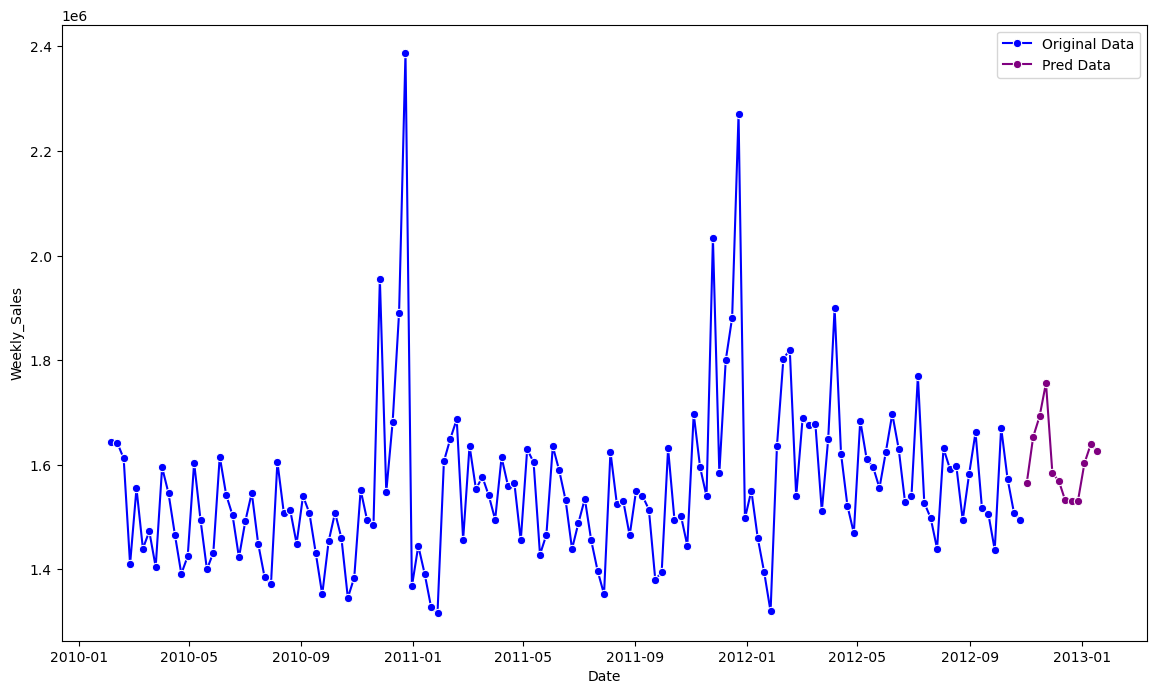

In [144]:
sarima = SARIMAX(store_1, order=(1,0,4), seasonal_order=(1,0,4,12))
sarima = sarima.fit()
sarima_pred = sarima.forecast(steps=12)
print('Forecast for store 1\n',sarima_pred)

plt.figure(figsize=(14,8))
sns.lineplot(data = store_1,x=store_1.index,y='Weekly_Sales',color='blue',marker='o',label = 'Original Data')
sns.lineplot(data = sarima_pred,x=sarima_pred.index,y=sarima_pred.values,color='purple',marker='o',label = 'Pred Data')
plt.show()

#### Now let's generalise the forecasting of each store inside a loop and print forecasted values and their graphs in order manner 

P, D, Q :  2 1 3
Forecast for store 1
 2012-11-02    1.445003e+06
2012-11-09    1.537172e+06
2012-11-16    1.516672e+06
2012-11-23    1.611804e+06
2012-11-30    1.497885e+06
2012-12-07    1.477396e+06
2012-12-14    1.492984e+06
2012-12-21    1.474577e+06
2012-12-28    1.480943e+06
2013-01-04    1.510396e+06
2013-01-11    1.536073e+06
2013-01-18    1.616684e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


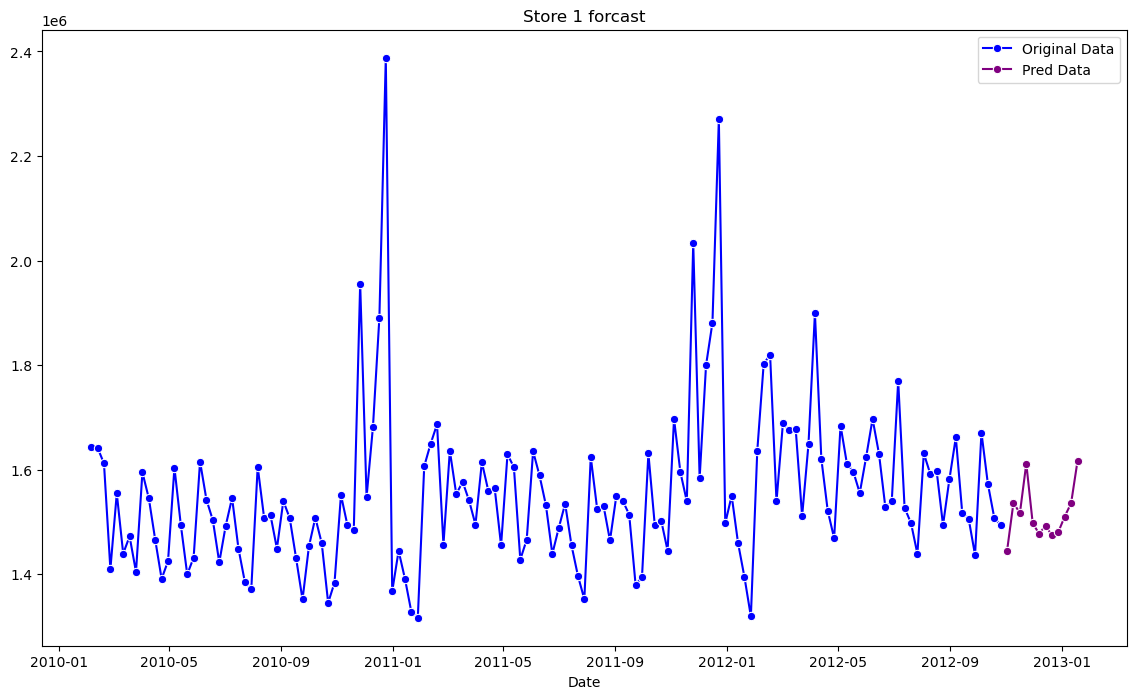

P, D, Q :  4 1 3
Forecast for store 2
 2012-11-02    1.768679e+06
2012-11-09    1.736760e+06
2012-11-16    1.748760e+06
2012-11-23    1.850558e+06
2012-11-30    1.745936e+06
2012-12-07    1.686048e+06
2012-12-14    1.771647e+06
2012-12-21    1.725878e+06
2012-12-28    1.771756e+06
2013-01-04    1.755400e+06
2013-01-11    1.770553e+06
2013-01-18    1.892122e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


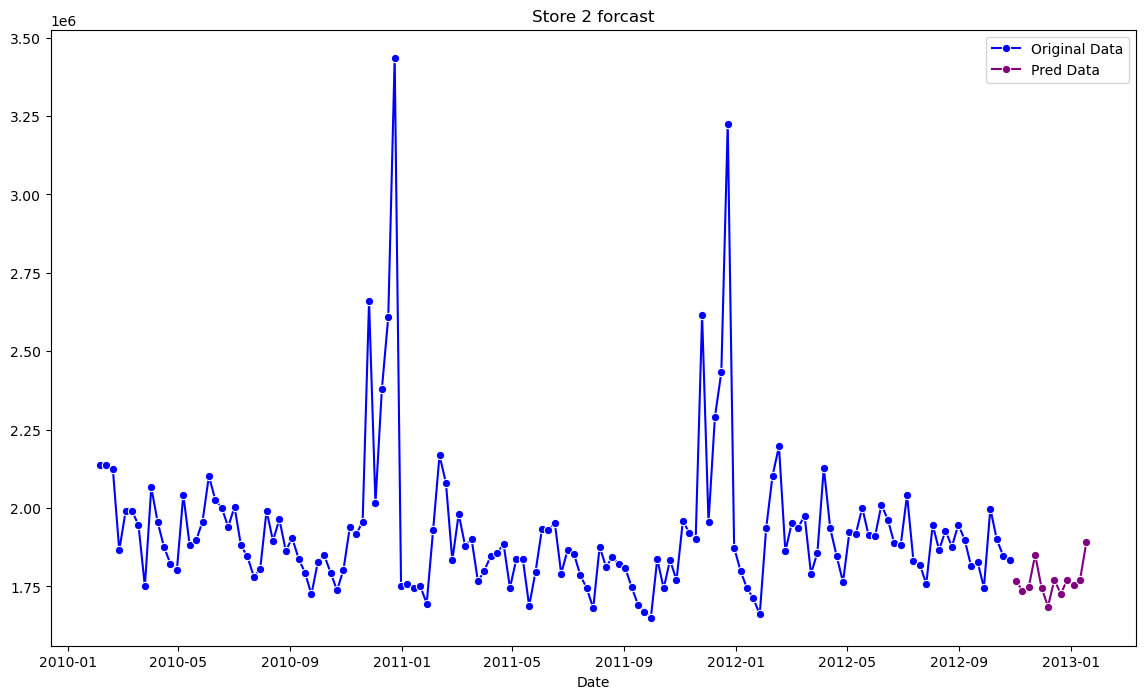

P, D, Q :  1 1 1
Forecast for store 3
 2012-11-02    388216.857334
2012-11-09    404162.782179
2012-11-16    412566.886111
2012-11-23    413998.263937
2012-11-30    404024.811764
2012-12-07    397529.324073
2012-12-14    410445.089916
2012-12-21    399799.721499
2012-12-28    415801.653888
2013-01-04    408450.567859
2013-01-11    416225.871855
2013-01-18    425200.568020
Freq: W-FRI, Name: predicted_mean, dtype: float64


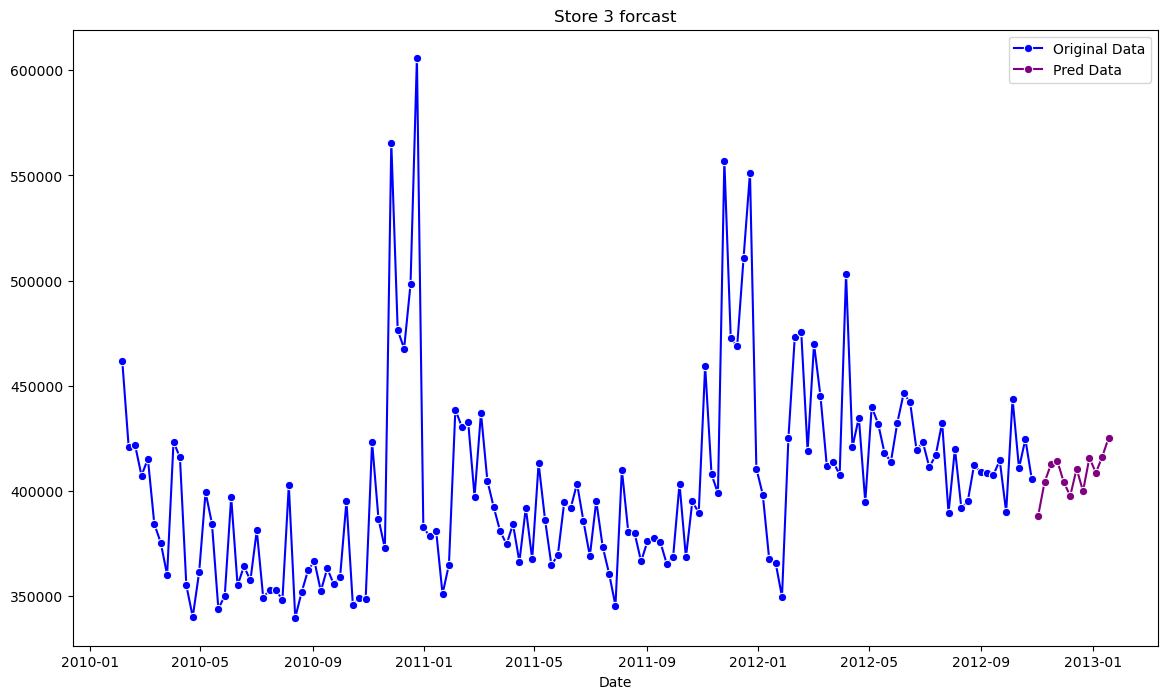

P, D, Q :  1 1 1
Forecast for store 4
 2012-11-02    2.041562e+06
2012-11-09    2.144343e+06
2012-11-16    2.151268e+06
2012-11-23    2.221072e+06
2012-11-30    2.092061e+06
2012-12-07    2.075226e+06
2012-12-14    2.117922e+06
2012-12-21    2.108841e+06
2012-12-28    2.102557e+06
2013-01-04    2.120777e+06
2013-01-11    2.127436e+06
2013-01-18    2.254843e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


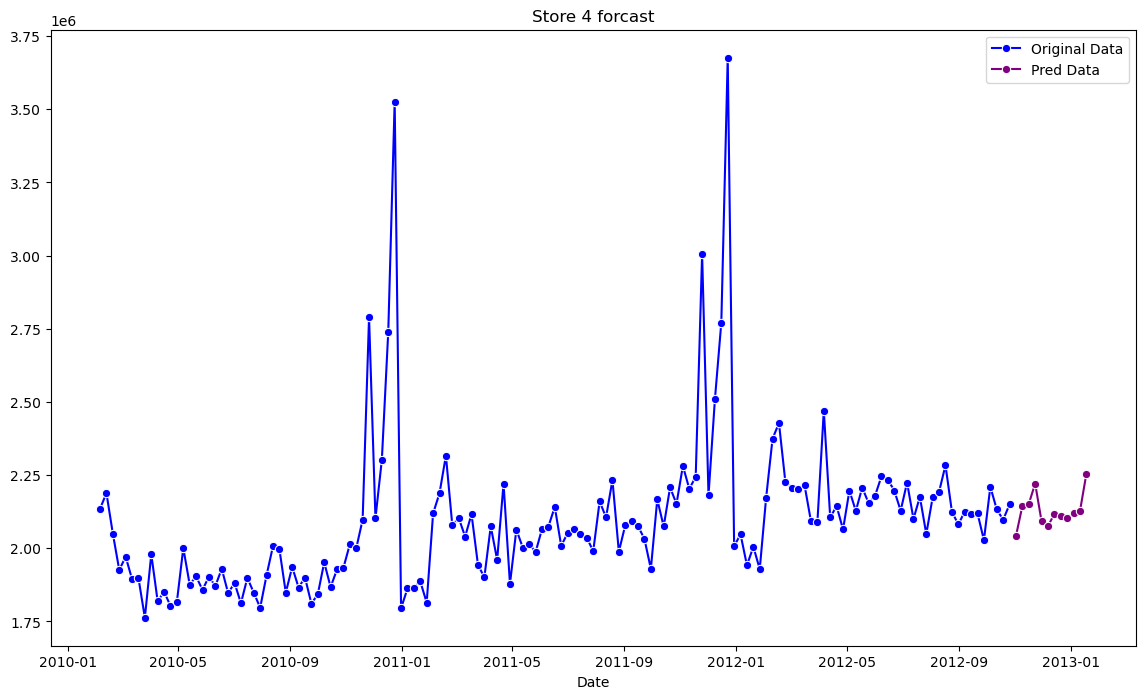

P, D, Q :  1 1 1
Forecast for store 5
 2012-11-02    301629.058846
2012-11-09    316485.721318
2012-11-16    322151.589770
2012-11-23    332790.165566
2012-11-30    324724.096409
2012-12-07    305834.757250
2012-12-14    314847.238655
2012-12-21    322344.244363
2012-12-28    322412.734643
2013-01-04    319636.809296
2013-01-11    319885.382434
2013-01-18    337477.321544
Freq: W-FRI, Name: predicted_mean, dtype: float64


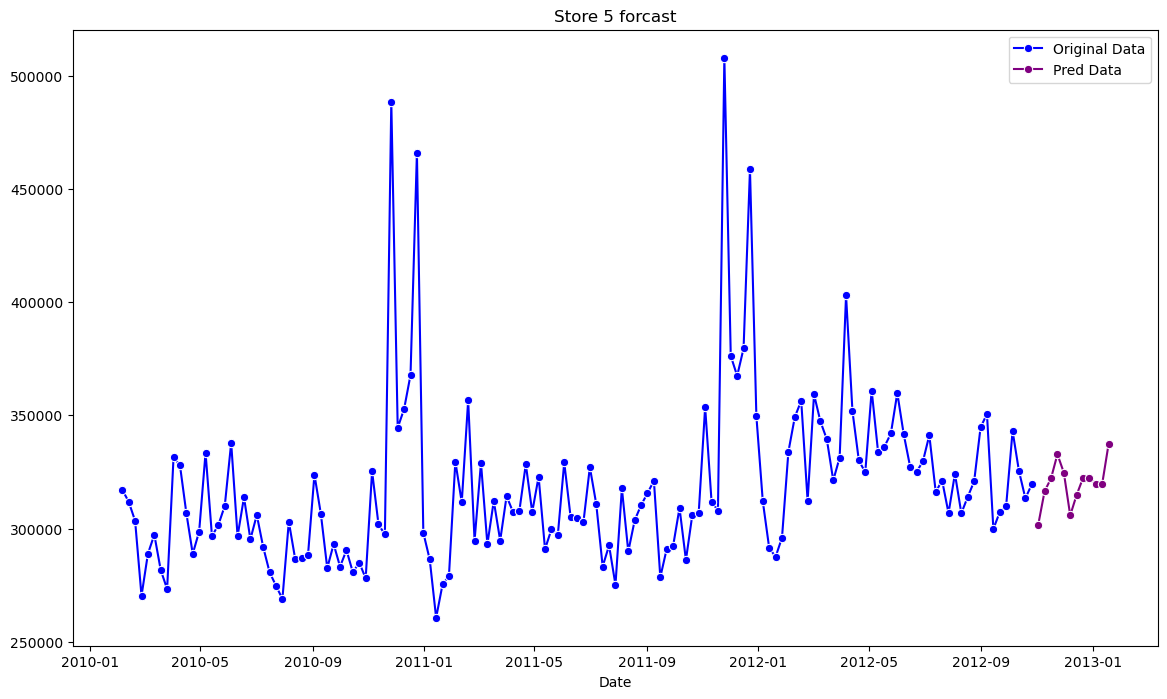

P, D, Q :  1 1 1
Forecast for store 6
 2012-11-02    1.326060e+06
2012-11-09    1.393026e+06
2012-11-16    1.420462e+06
2012-11-23    1.514057e+06
2012-11-30    1.404896e+06
2012-12-07    1.321009e+06
2012-12-14    1.373889e+06
2012-12-21    1.398986e+06
2012-12-28    1.343666e+06
2013-01-04    1.362866e+06
2013-01-11    1.382155e+06
2013-01-18    1.474965e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


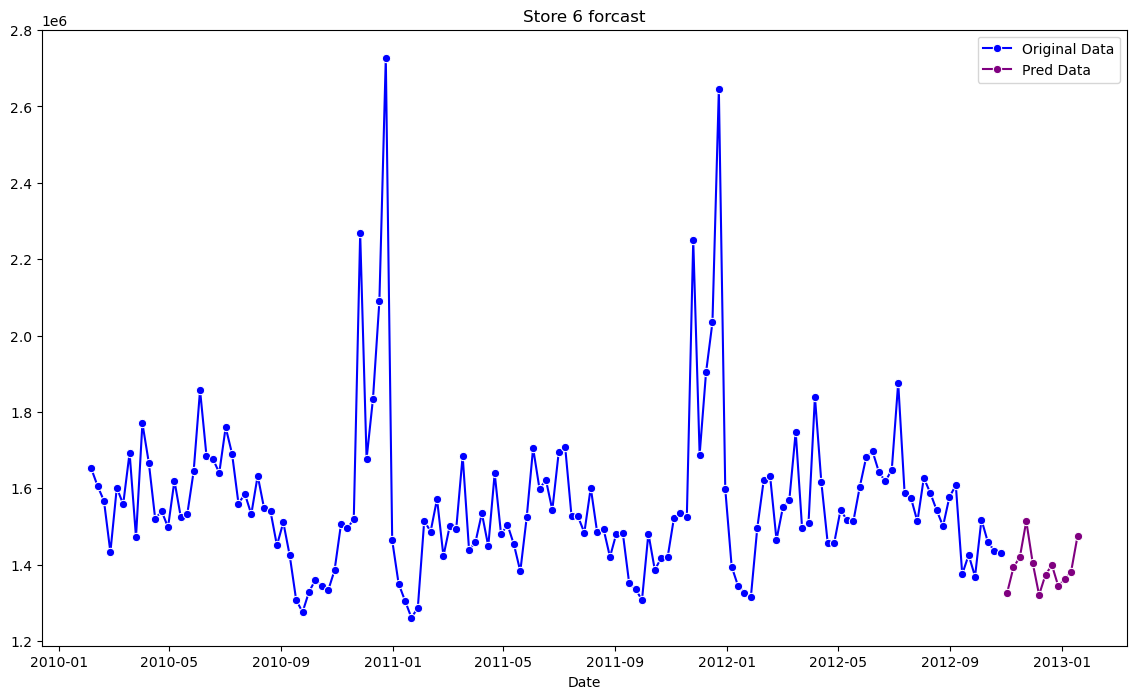

P, D, Q :  0 1 1
Forecast for store 7
 2012-11-02    463166.350412
2012-11-09    468874.827132
2012-11-16    482822.025559
2012-11-23    527760.260371
2012-11-30    498182.295036
2012-12-07    475885.874924
2012-12-14    471145.523878
2012-12-21    486308.061305
2012-12-28    440723.912368
2013-01-04    447160.278496
2013-01-11    453137.432727
2013-01-18    501281.746886
Freq: W-FRI, Name: predicted_mean, dtype: float64


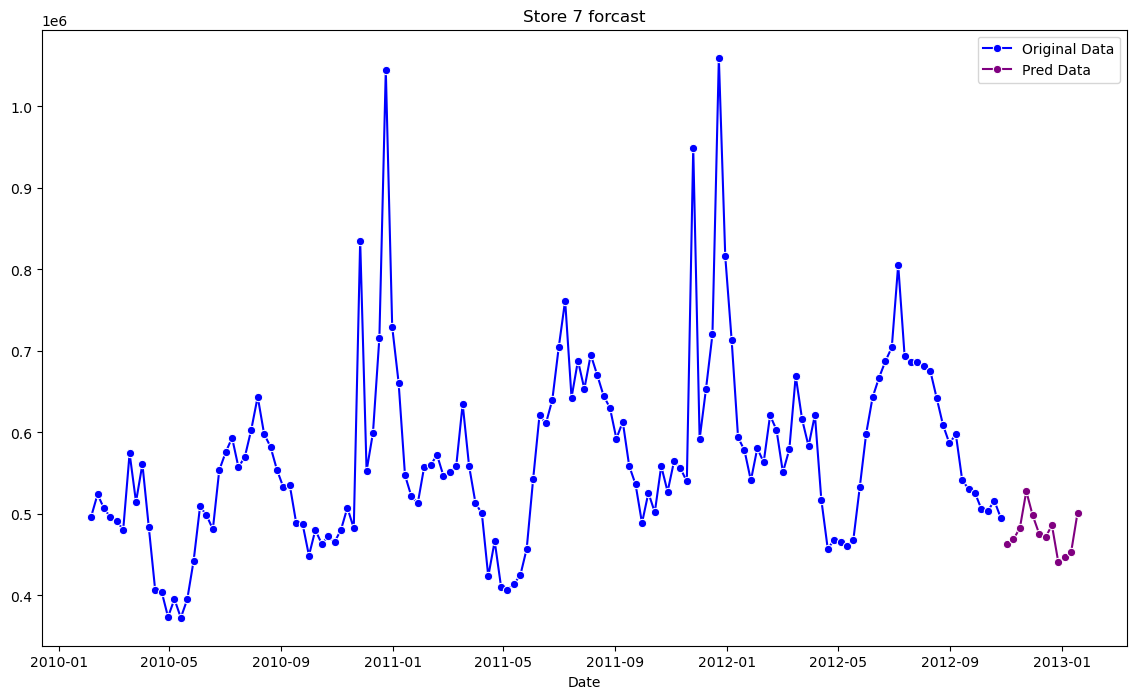

P, D, Q :  1 1 1
Forecast for store 8
 2012-11-02    856652.166881
2012-11-09    888352.749206
2012-11-16    914389.421356
2012-11-23    953022.733264
2012-11-30    885269.092410
2012-12-07    872350.629841
2012-12-14    883006.469330
2012-12-21    898874.556212
2012-12-28    888383.688657
2013-01-04    897320.219750
2013-01-11    904271.288756
2013-01-18    948172.662600
Freq: W-FRI, Name: predicted_mean, dtype: float64


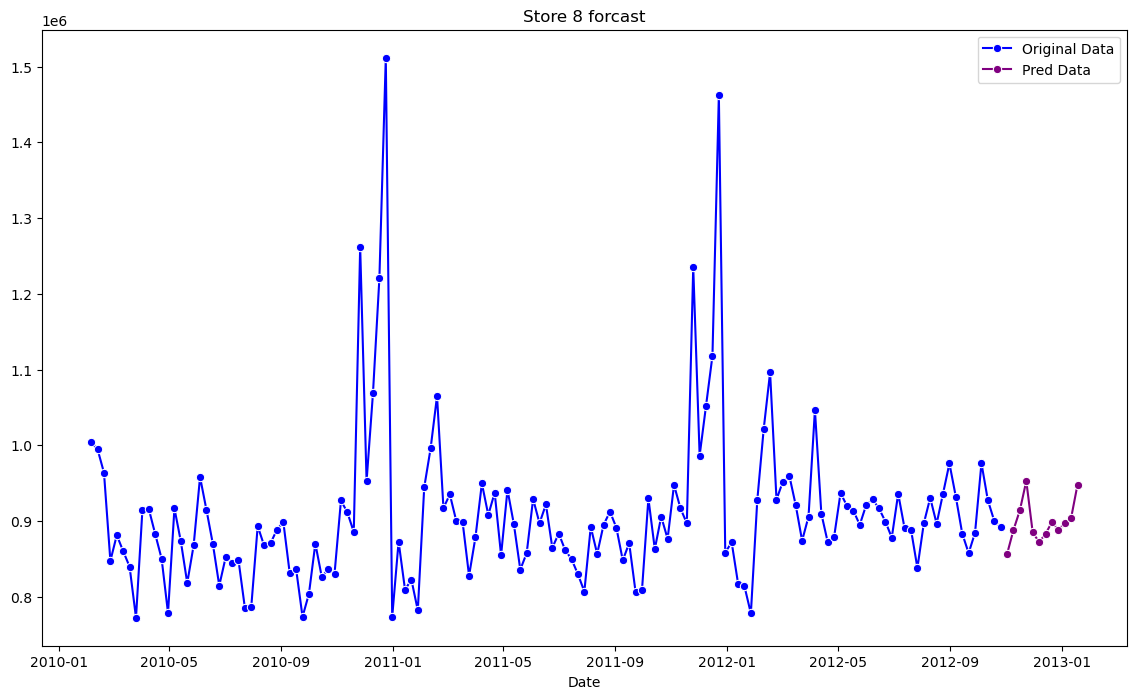

P, D, Q :  1 1 1
Forecast for store 9
 2012-11-02    517610.483985
2012-11-09    538699.156029
2012-11-16    560763.165118
2012-11-23    577024.023253
2012-11-30    541794.325363
2012-12-07    532093.760029
2012-12-14    542536.372709
2012-12-21    545777.050370
2012-12-28    550092.457017
2013-01-04    546778.369335
2013-01-11    548325.312646
2013-01-18    585263.155206
Freq: W-FRI, Name: predicted_mean, dtype: float64


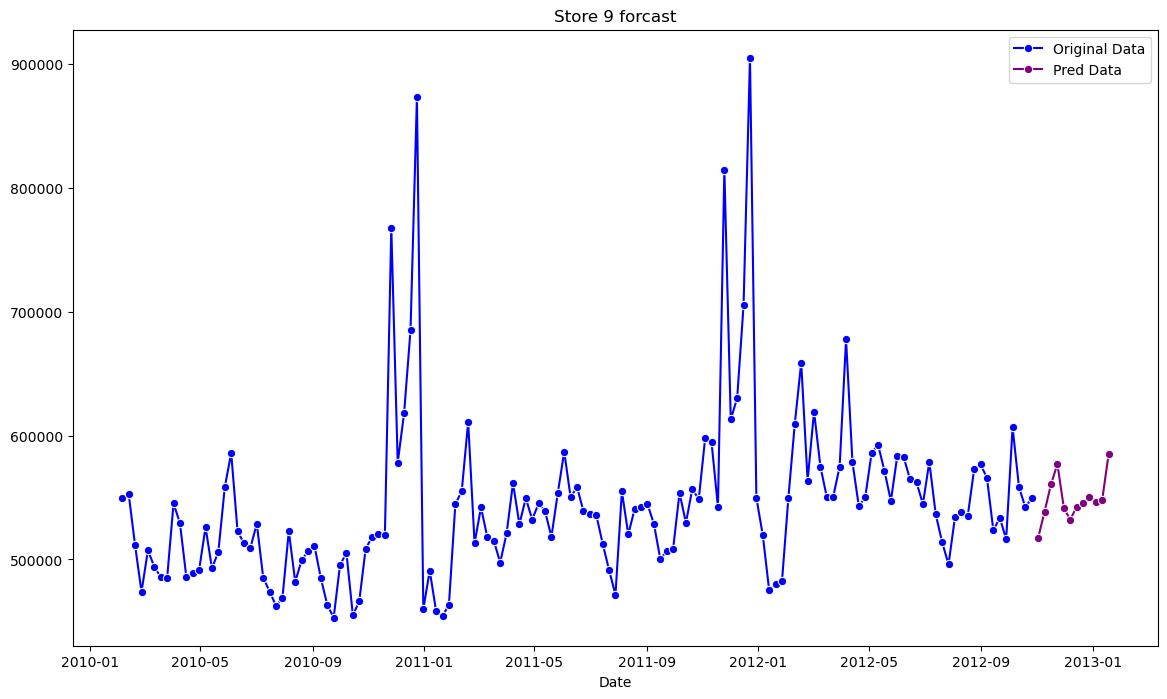

P, D, Q :  0 1 5
Forecast for store 10
 2012-11-02    1.583413e+06
2012-11-09    1.582905e+06
2012-11-16    1.649521e+06
2012-11-23    1.666897e+06
2012-11-30    1.585913e+06
2012-12-07    1.525621e+06
2012-12-14    1.574661e+06
2012-12-21    1.603361e+06
2012-12-28    1.577749e+06
2013-01-04    1.629094e+06
2013-01-11    1.653288e+06
2013-01-18    1.811636e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


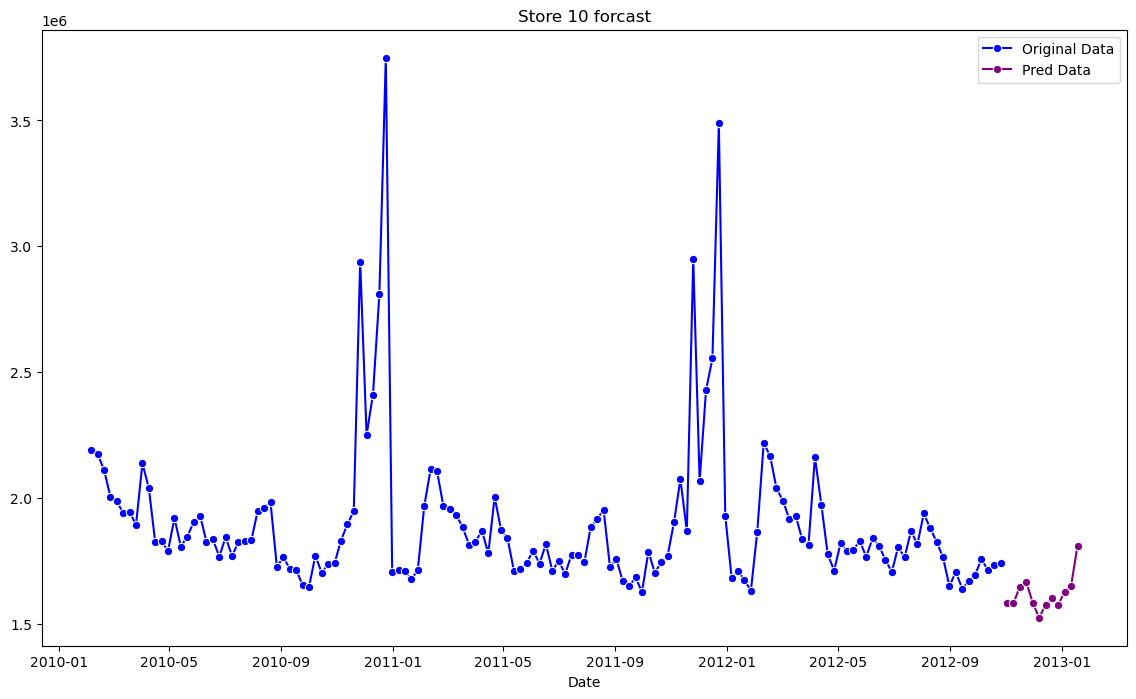

P, D, Q :  1 1 1
Forecast for store 11
 2012-11-02    1.141184e+06
2012-11-09    1.228769e+06
2012-11-16    1.263735e+06
2012-11-23    1.309240e+06
2012-11-30    1.206687e+06
2012-12-07    1.193993e+06
2012-12-14    1.228307e+06
2012-12-21    1.235919e+06
2012-12-28    1.223171e+06
2013-01-04    1.220821e+06
2013-01-11    1.221971e+06
2013-01-18    1.279151e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


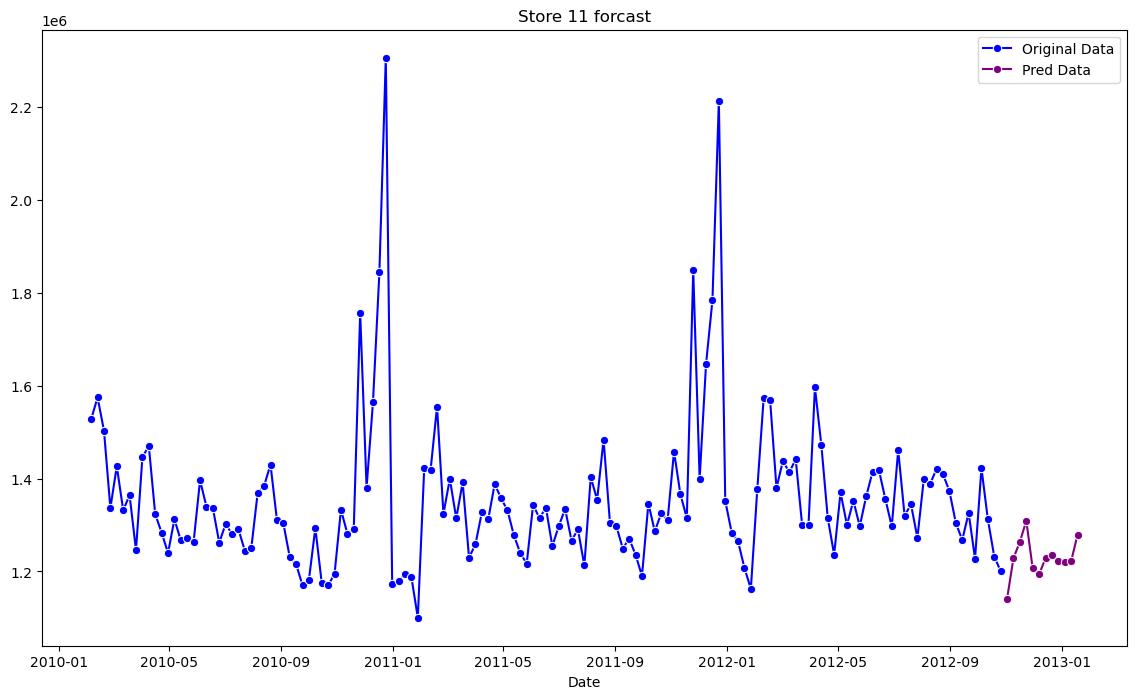

P, D, Q :  4 1 3
Forecast for store 12
 2012-11-02    9.501084e+05
2012-11-09    9.251013e+05
2012-11-16    9.512929e+05
2012-11-23    9.904483e+05
2012-11-30    9.290303e+05
2012-12-07    8.837287e+05
2012-12-14    9.151398e+05
2012-12-21    9.348393e+05
2012-12-28    9.358814e+05
2013-01-04    9.433039e+05
2013-01-11    9.527731e+05
2013-01-18    1.064809e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


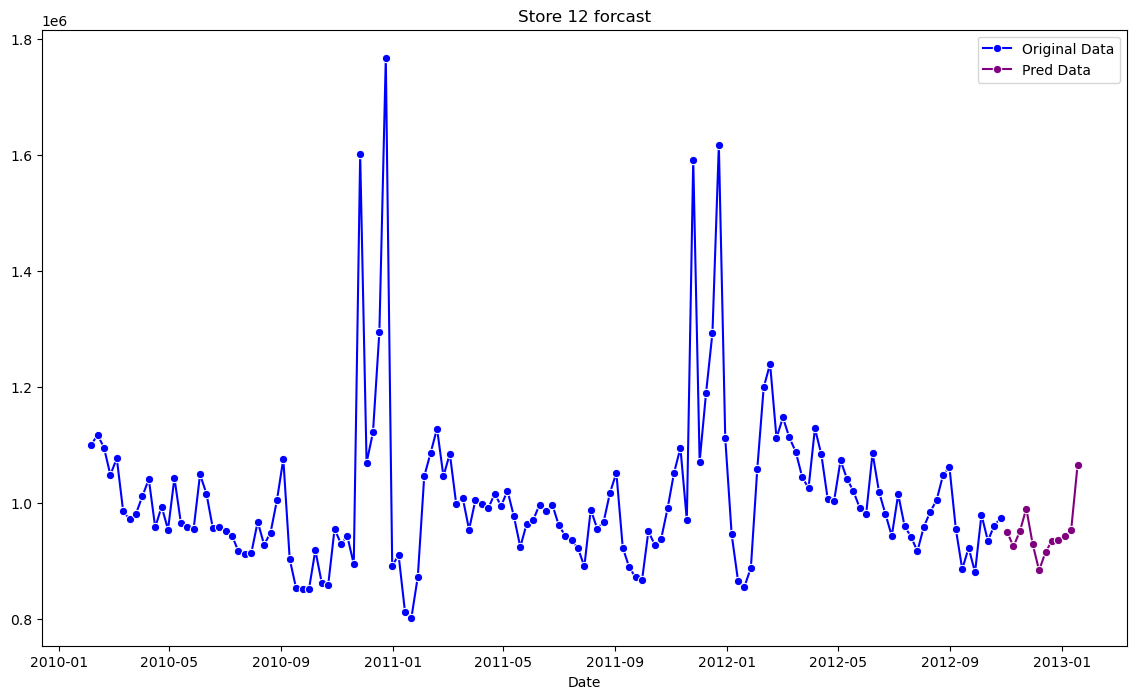

P, D, Q :  1 1 1
Forecast for store 13
 2012-11-02    1.886184e+06
2012-11-09    2.003926e+06
2012-11-16    2.032071e+06
2012-11-23    2.154235e+06
2012-11-30    2.000939e+06
2012-12-07    1.937051e+06
2012-12-14    1.969310e+06
2012-12-21    2.012787e+06
2012-12-28    1.940716e+06
2013-01-04    2.001291e+06
2013-01-11    1.996179e+06
2013-01-18    2.142723e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


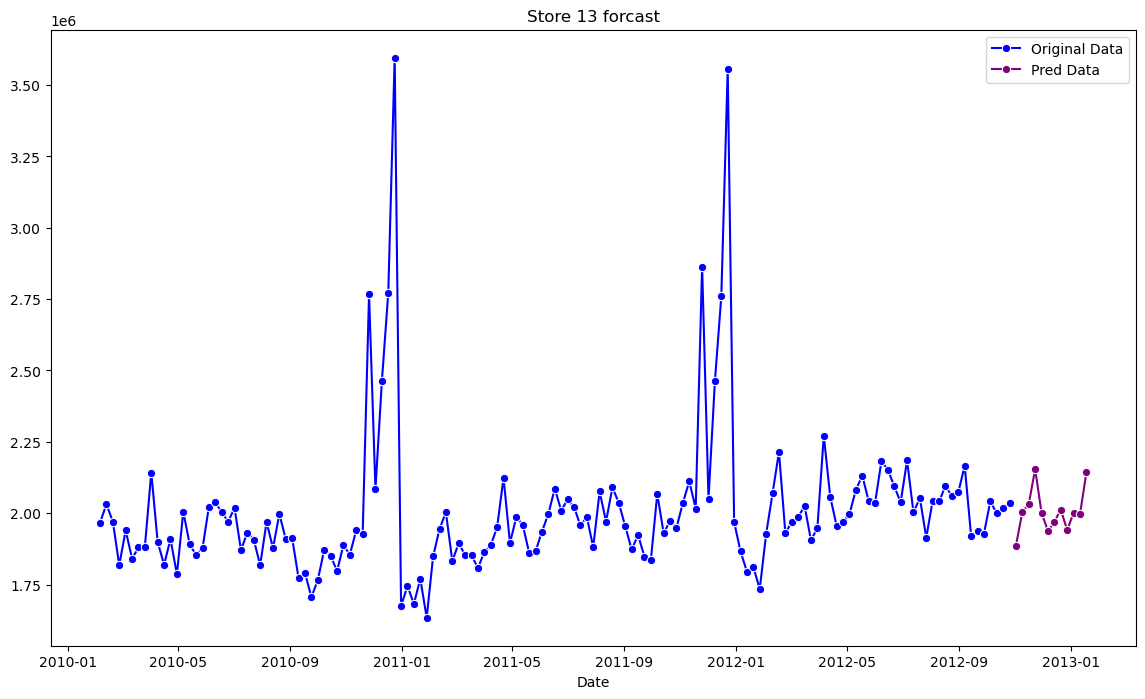

P, D, Q :  2 1 2
Forecast for store 14
 2012-11-02    1.594374e+06
2012-11-09    1.679189e+06
2012-11-16    1.698391e+06
2012-11-23    1.775682e+06
2012-11-30    1.675886e+06
2012-12-07    1.517545e+06
2012-12-14    1.551325e+06
2012-12-21    1.598998e+06
2012-12-28    1.527891e+06
2013-01-04    1.553410e+06
2013-01-11    1.579572e+06
2013-01-18    1.684853e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


P, D, Q :  1 1 3
Forecast for store 15
 2012-11-02    509654.935582
2012-11-09    534359.597539
2012-11-16    576595.407043
2012-11-23    584028.178618
2012-11-30    538896.471776
2012-12-07    514741.698054
2012-12-14    527681.751160
2012-12-21    545665.506207
2012-12-28    514902.696836
2013-01-04    523002.567540
2013-01-11    543747.805783
2013-01-18    600342.260193
Freq: W-FRI, Name: predicted_mean, dtype: float64


P, D, Q :  1 1 3
Forecast for store 16
 2012-11-02    456378.410831
2012-11-09    446820.829808
2012-11-16    529752.644686
2012-11-23    542213.079119
2012-11-30    515505.883799
2012-12-07    485444.149293
2012-12-14    495600.053092
2012-12-21    485305.698635
2012-12-28    464335.864233
2013-01-04    460788.317433
2013-01-11    480260.539243
2013-01-18    507504.987869
Freq: W-FRI, Name: predicted_mean, dtype: float64


P, D, Q :  0 1 1
Forecast for store 17
 2012-11-02    9.317728e+05
2012-11-09    9.754481e+05
2012-11-16    9.647861e+05
2012-11-23    9.779392e+05
2012-11-30    1.003640e+06
2012-12-07    1.009610e+06
2012-12-14    9.652704e+05
2012-12-21    9.776445e+05
2012-12-28    9.886245e+05
2013-01-04    9.615079e+05
2013-01-11    9.656192e+05
2013-01-18    1.000408e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


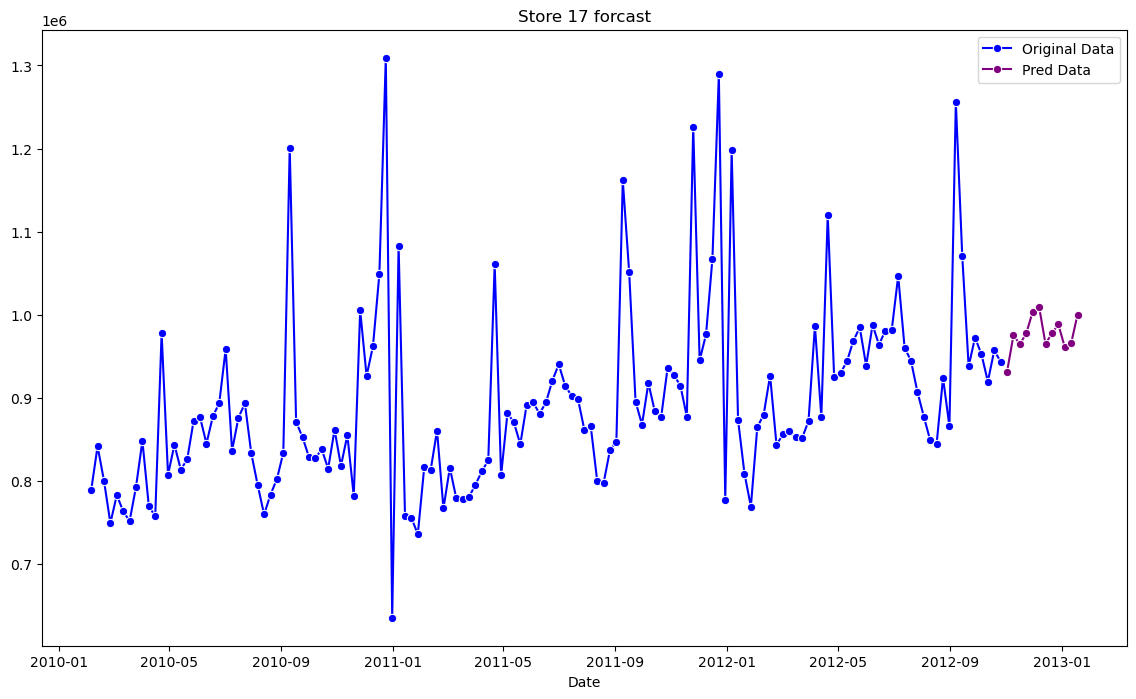

P, D, Q :  0 1 1
Forecast for store 18
 2012-11-02    1.028635e+06
2012-11-09    1.090923e+06
2012-11-16    1.140994e+06
2012-11-23    1.162022e+06
2012-11-30    1.070235e+06
2012-12-07    1.052397e+06
2012-12-14    1.086467e+06
2012-12-21    1.103708e+06
2012-12-28    1.057684e+06
2013-01-04    1.090077e+06
2013-01-11    1.112153e+06
2013-01-18    1.152481e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


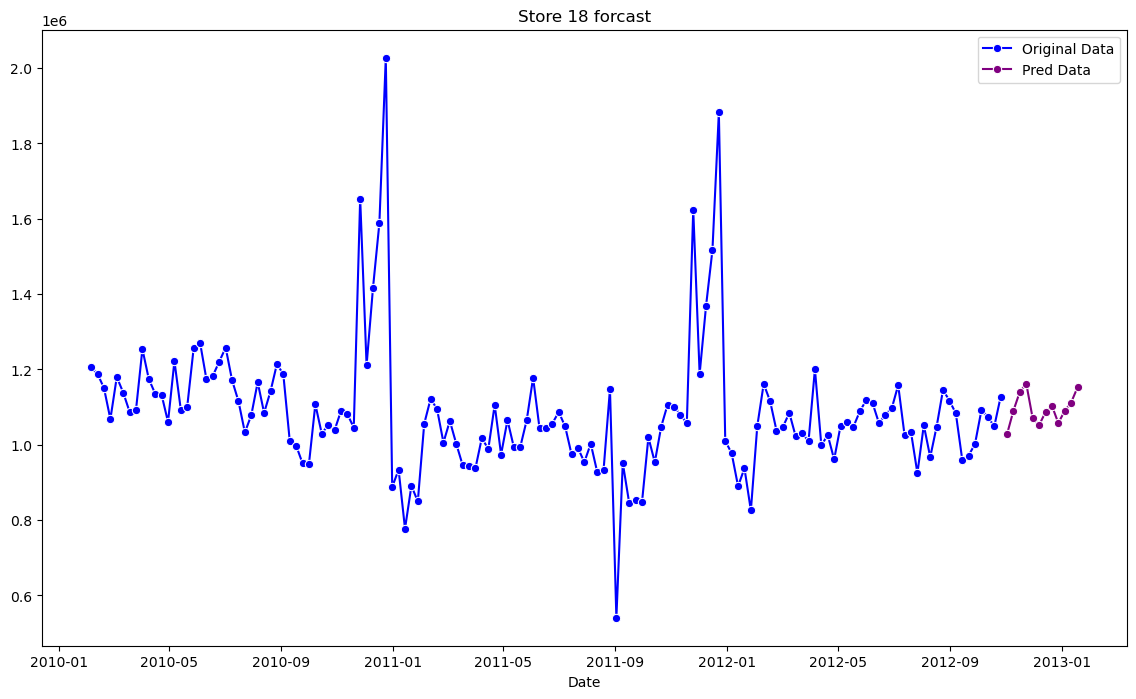

P, D, Q :  1 1 3
Forecast for store 19
 2012-11-02    1.266085e+06
2012-11-09    1.312002e+06
2012-11-16    1.399588e+06
2012-11-23    1.431526e+06
2012-11-30    1.347886e+06
2012-12-07    1.290682e+06
2012-12-14    1.315065e+06
2012-12-21    1.334352e+06
2012-12-28    1.289170e+06
2013-01-04    1.301433e+06
2013-01-11    1.321601e+06
2013-01-18    1.411058e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


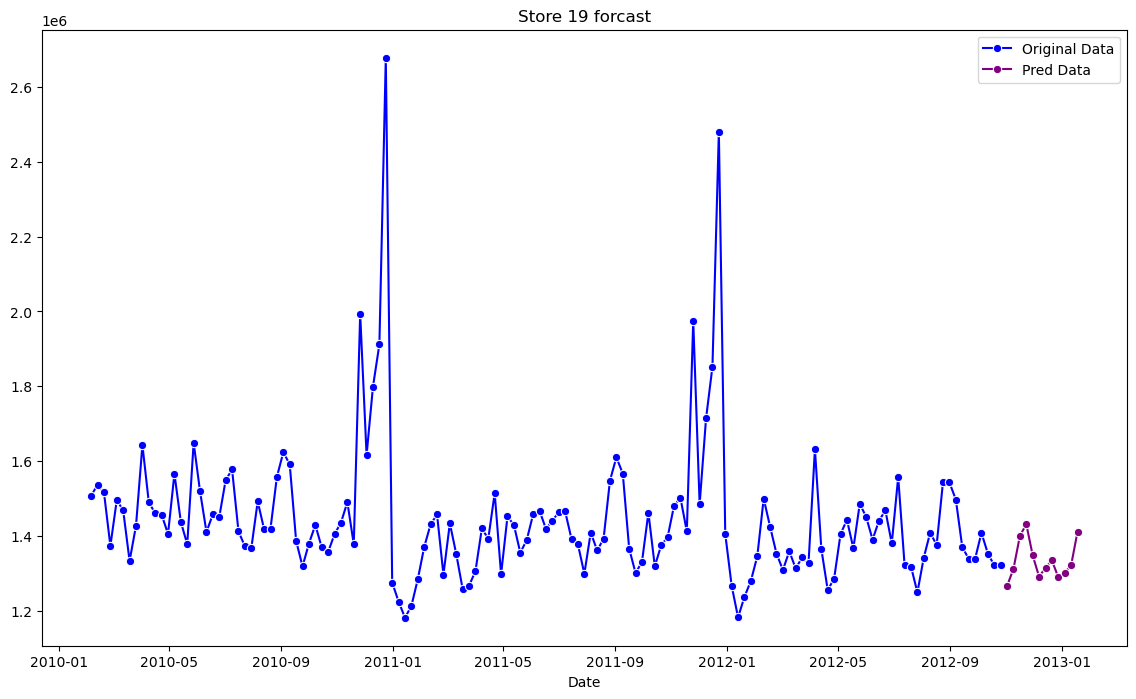

P, D, Q :  1 1 3
Forecast for store 20
 2012-11-02    1.955910e+06
2012-11-09    2.021137e+06
2012-11-16    2.065158e+06
2012-11-23    2.146260e+06
2012-11-30    2.026037e+06
2012-12-07    1.986511e+06
2012-12-14    2.048512e+06
2012-12-21    2.055086e+06
2012-12-28    2.035179e+06
2013-01-04    2.045141e+06
2013-01-11    2.043090e+06
2013-01-18    2.162697e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


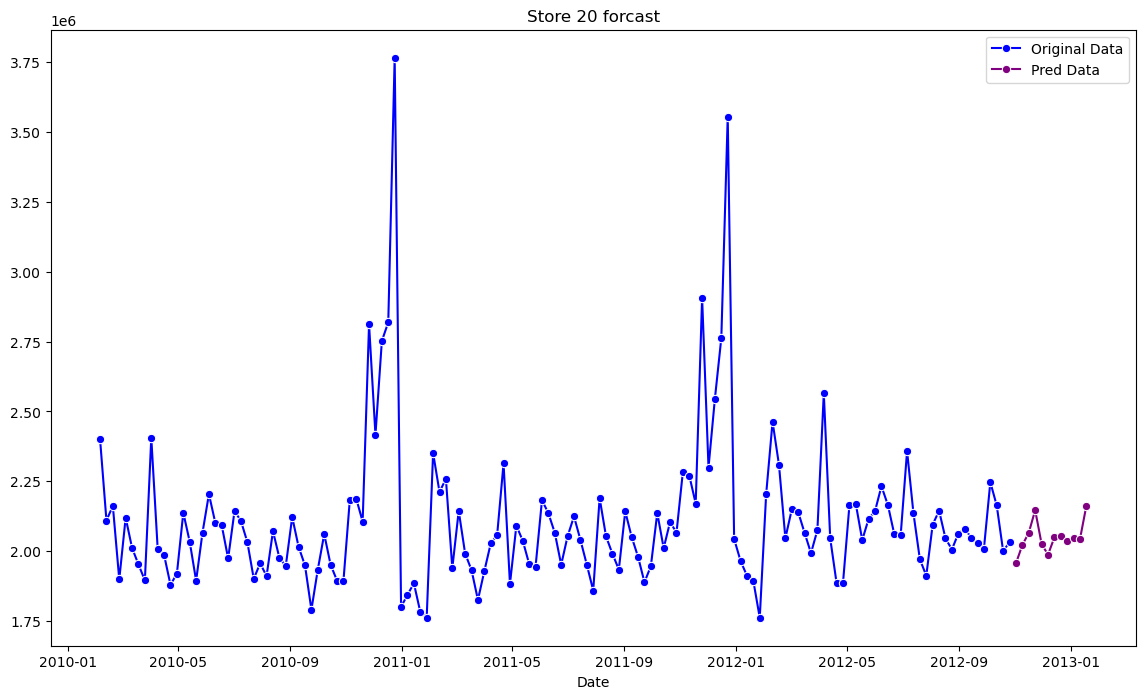

P, D, Q :  1 1 3
Forecast for store 21
 2012-11-02    606718.592924
2012-11-09    647513.957605
2012-11-16    690392.975641
2012-11-23    717453.100060
2012-11-30    618291.598788
2012-12-07    595209.691984
2012-12-14    617645.287119
2012-12-21    635236.225421
2012-12-28    606459.874934
2013-01-04    617984.644627
2013-01-11    629940.739562
2013-01-18    696001.772984
Freq: W-FRI, Name: predicted_mean, dtype: float64


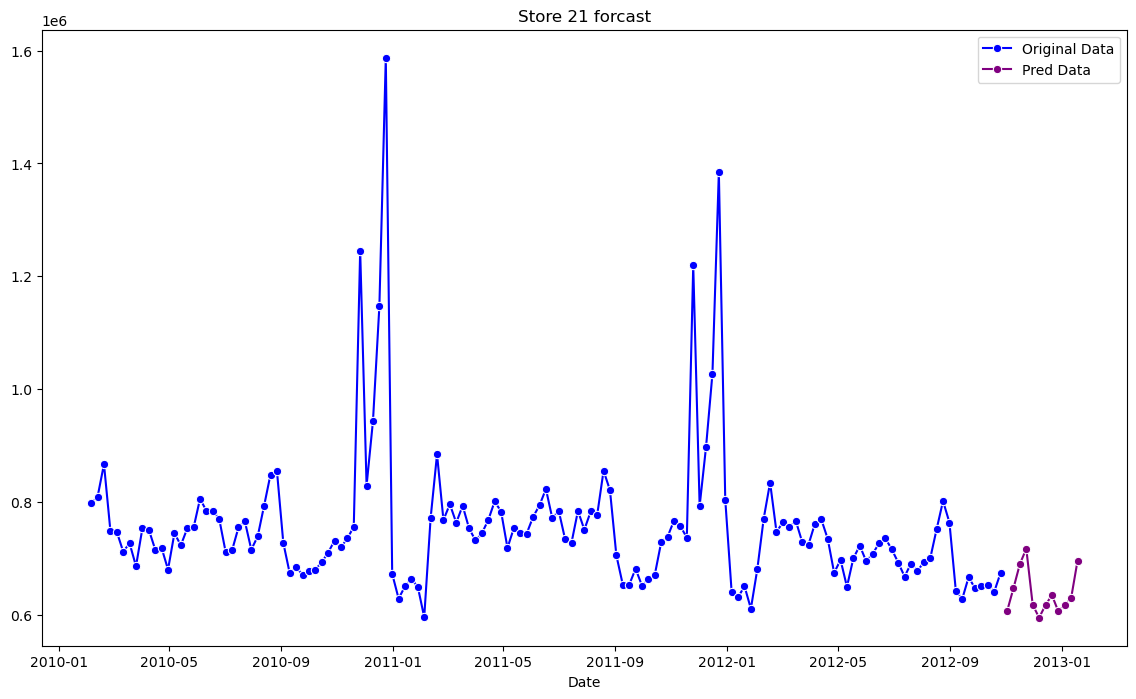

P, D, Q :  1 1 1
Forecast for store 22
 2012-11-02    9.711302e+05
2012-11-09    1.027590e+06
2012-11-16    1.068310e+06
2012-11-23    1.104629e+06
2012-11-30    1.005540e+06
2012-12-07    9.881654e+05
2012-12-14    1.016676e+06
2012-12-21    1.030997e+06
2012-12-28    9.878890e+05
2013-01-04    1.010654e+06
2013-01-11    1.033219e+06
2013-01-18    1.099423e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


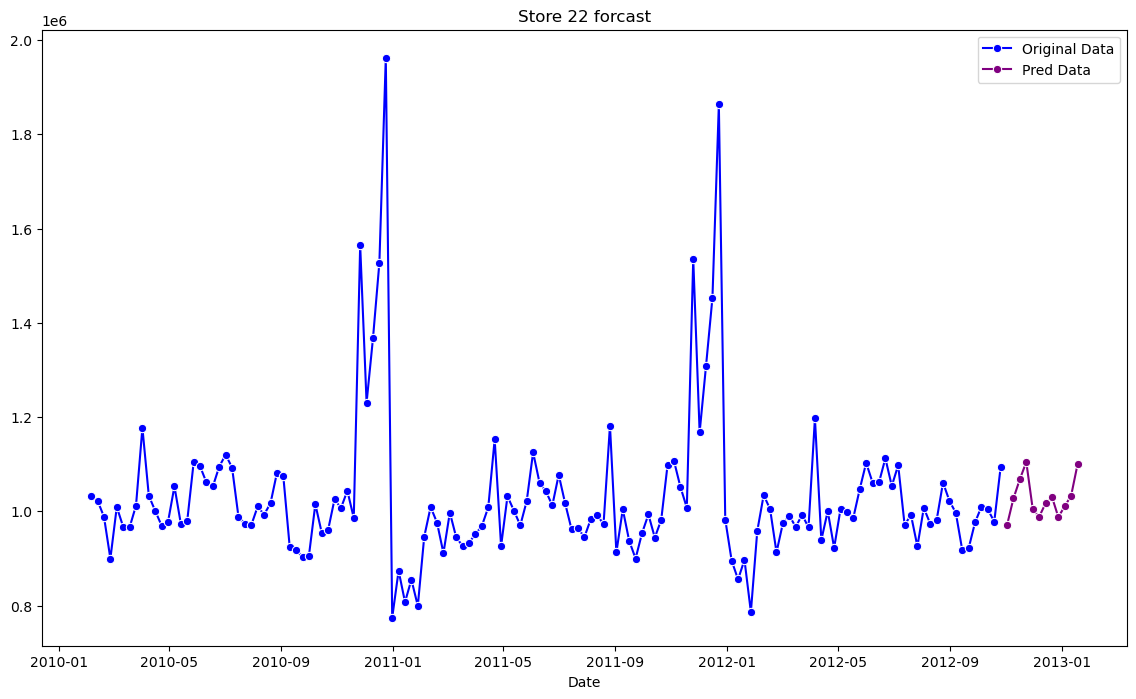

P, D, Q :  2 1 2
Forecast for store 23
 2012-11-02    1.274145e+06
2012-11-09    1.368127e+06
2012-11-16    1.464929e+06
2012-11-23    1.489290e+06
2012-11-30    1.357279e+06
2012-12-07    1.296030e+06
2012-12-14    1.376541e+06
2012-12-21    1.357728e+06
2012-12-28    1.337714e+06
2013-01-04    1.366270e+06
2013-01-11    1.383802e+06
2013-01-18    1.465107e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


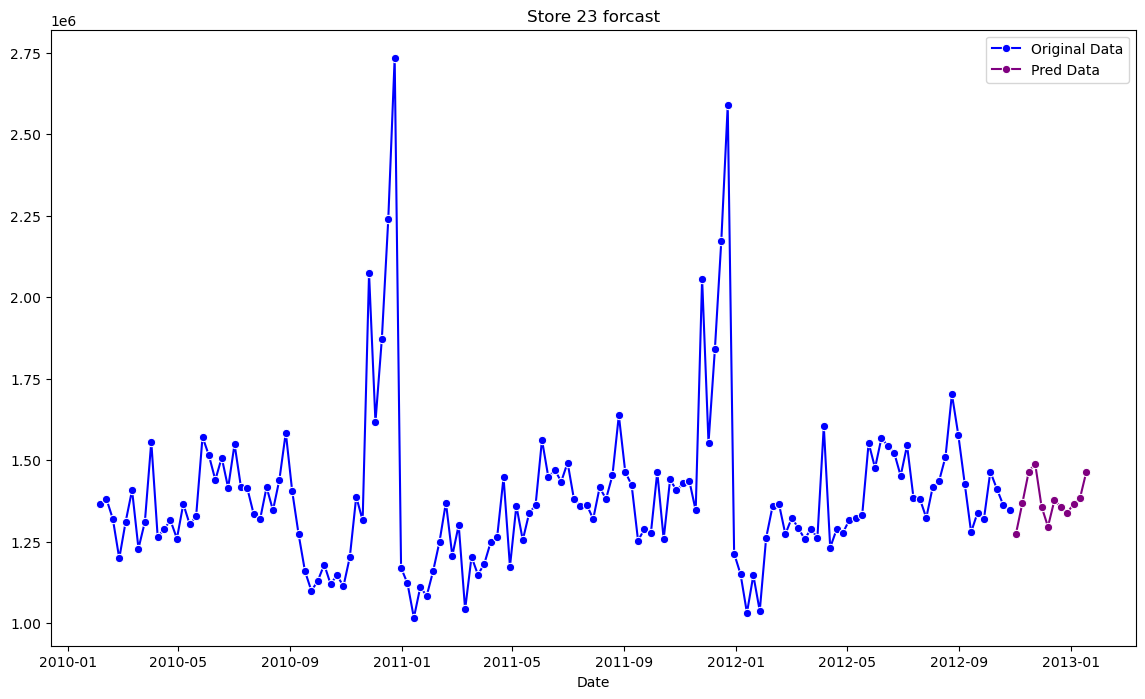

P, D, Q :  1 1 3
Forecast for store 24
 2012-11-02    1.237927e+06
2012-11-09    1.327401e+06
2012-11-16    1.346974e+06
2012-11-23    1.427289e+06
2012-11-30    1.320280e+06
2012-12-07    1.269507e+06
2012-12-14    1.278560e+06
2012-12-21    1.313819e+06
2012-12-28    1.289756e+06
2013-01-04    1.319037e+06
2013-01-11    1.283477e+06
2013-01-18    1.311190e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


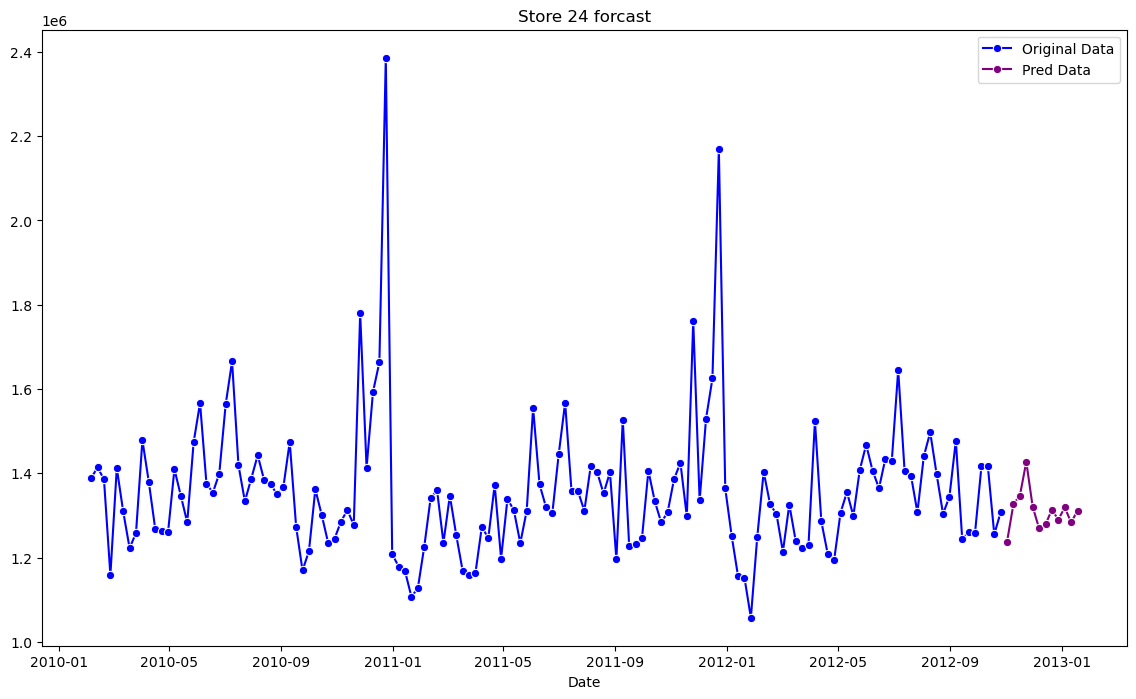

P, D, Q :  0 1 1
Forecast for store 25
 2012-11-02    641046.864512
2012-11-09    669599.235109
2012-11-16    672050.407832
2012-11-23    704338.765448
2012-11-30    648100.566965
2012-12-07    635553.545664
2012-12-14    649707.586716
2012-12-21    659802.958817
2012-12-28    643998.833025
2013-01-04    655388.860940
2013-01-11    658546.895502
2013-01-18    713870.135207
Freq: W-FRI, Name: predicted_mean, dtype: float64


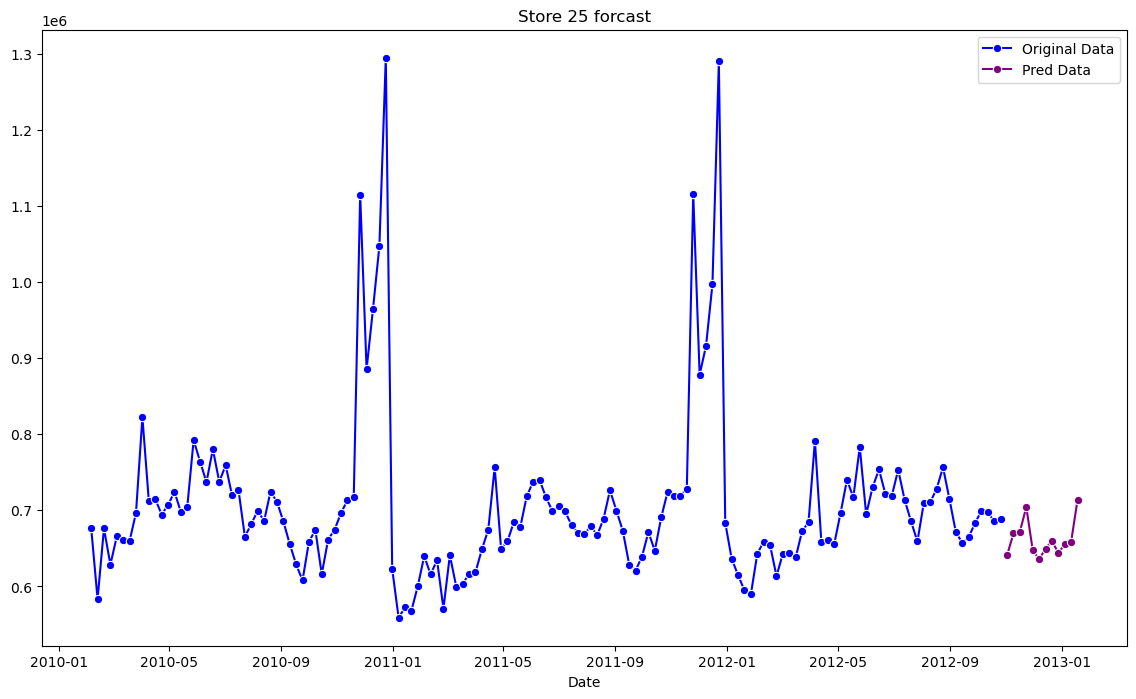

P, D, Q :  1 1 3
Forecast for store 26
 2012-11-02    9.376270e+05
2012-11-09    9.827920e+05
2012-11-16    1.005061e+06
2012-11-23    1.045022e+06
2012-11-30    9.774444e+05
2012-12-07    9.530477e+05
2012-12-14    9.556916e+05
2012-12-21    9.700565e+05
2012-12-28    9.755946e+05
2013-01-04    9.763041e+05
2013-01-11    9.756863e+05
2013-01-18    1.002289e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


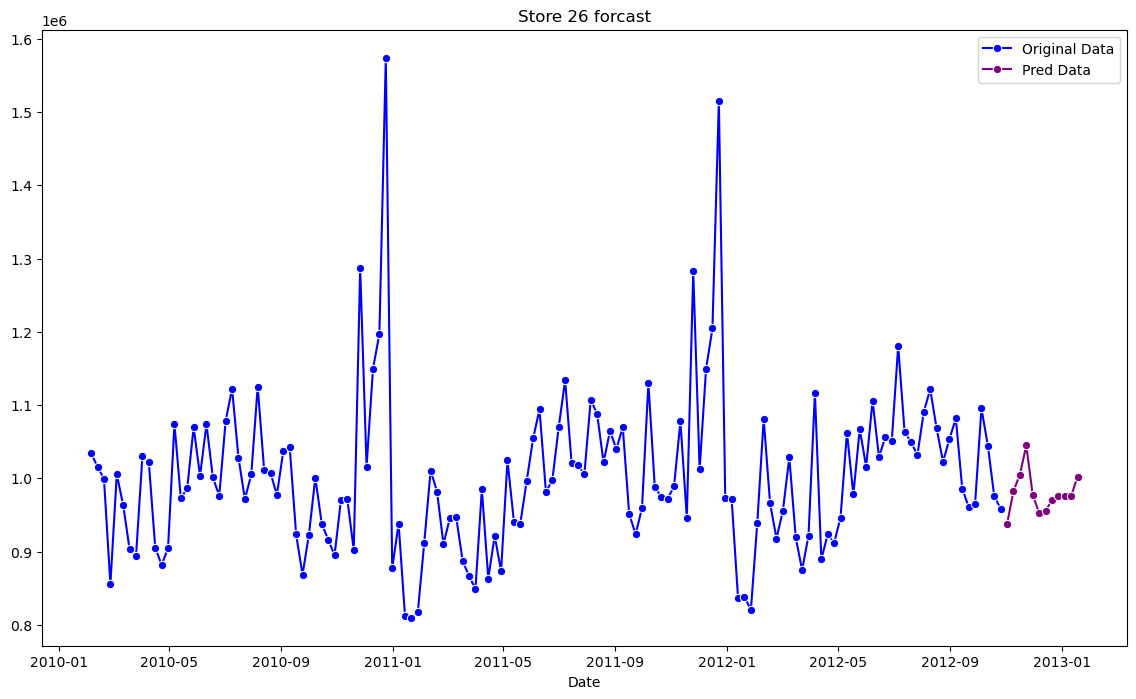

P, D, Q :  1 1 1
Forecast for store 27
 2012-11-02    1.597124e+06
2012-11-09    1.652898e+06
2012-11-16    1.718238e+06
2012-11-23    1.756774e+06
2012-11-30    1.640859e+06
2012-12-07    1.582153e+06
2012-12-14    1.642099e+06
2012-12-21    1.678589e+06
2012-12-28    1.572004e+06
2013-01-04    1.632052e+06
2013-01-11    1.658630e+06
2013-01-18    1.727491e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


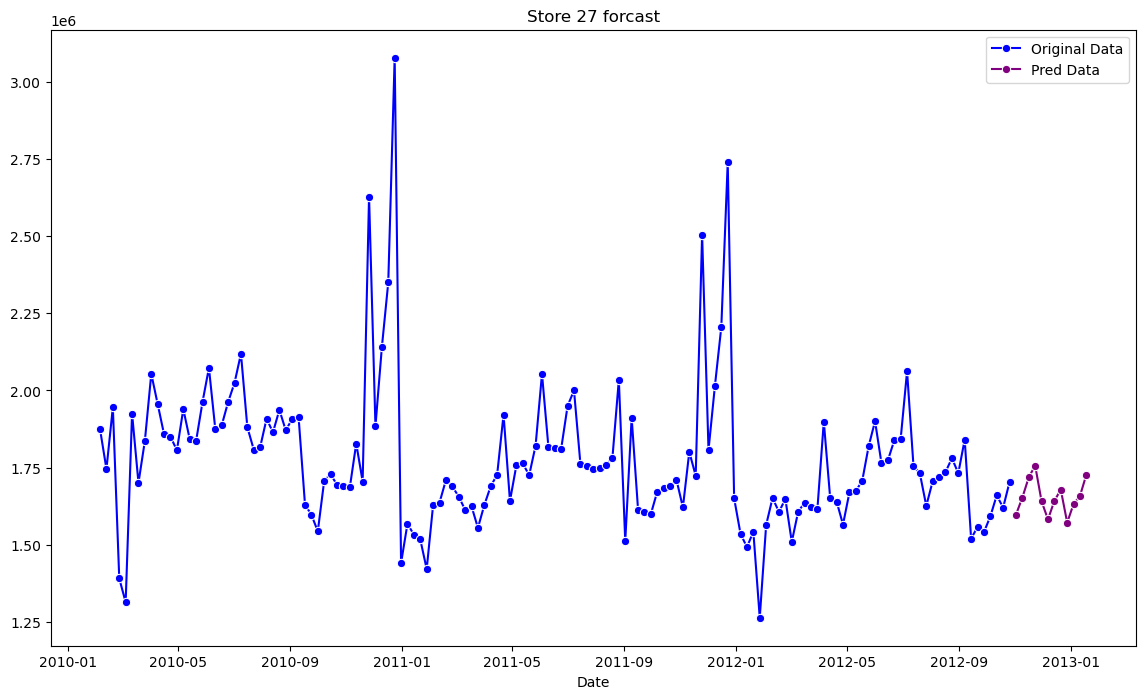

P, D, Q :  3 1 3
Forecast for store 28
 2012-11-02    1.152875e+06
2012-11-09    1.136730e+06
2012-11-16    1.180988e+06
2012-11-23    1.187524e+06
2012-11-30    1.203680e+06
2012-12-07    1.110824e+06
2012-12-14    1.102196e+06
2012-12-21    1.079187e+06
2012-12-28    1.136297e+06
2013-01-04    1.181603e+06
2013-01-11    1.190680e+06
2013-01-18    1.236195e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


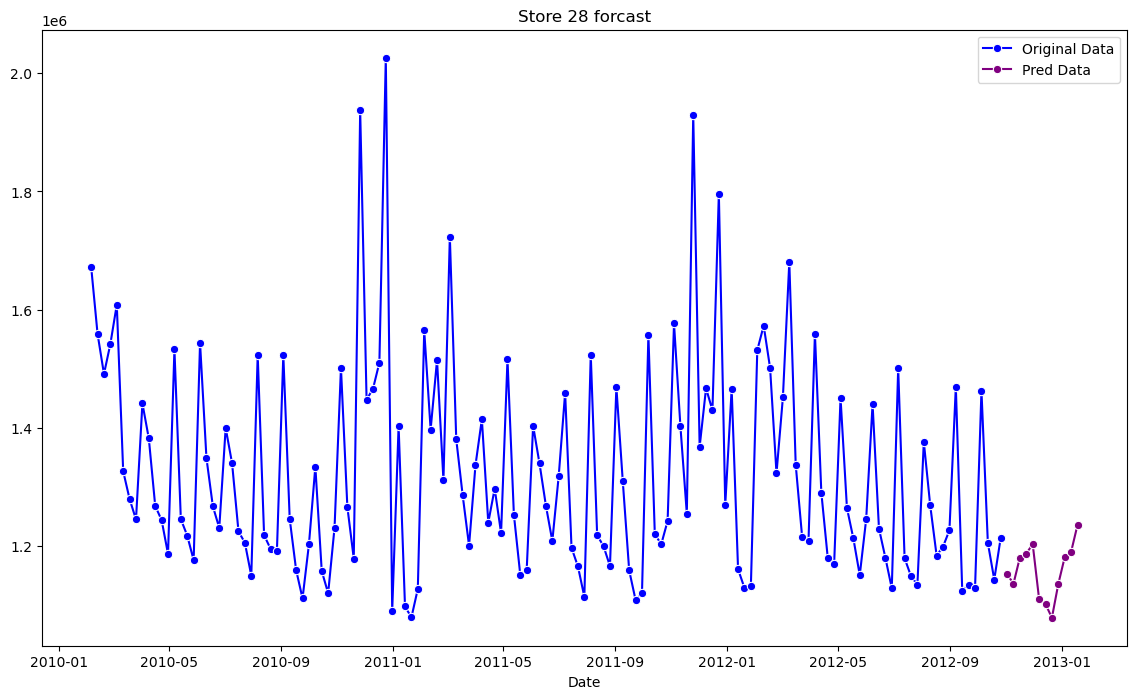

P, D, Q :  0 1 1
Forecast for store 29
 2012-11-02    480098.036399
2012-11-09    479394.551819
2012-11-16    537274.823182
2012-11-23    545421.707235
2012-11-30    501837.790317
2012-12-07    484839.746201
2012-12-14    501733.582798
2012-12-21    512860.809244
2012-12-28    490180.325307
2013-01-04    498458.807568
2013-01-11    511316.303907
2013-01-18    557864.851245
Freq: W-FRI, Name: predicted_mean, dtype: float64


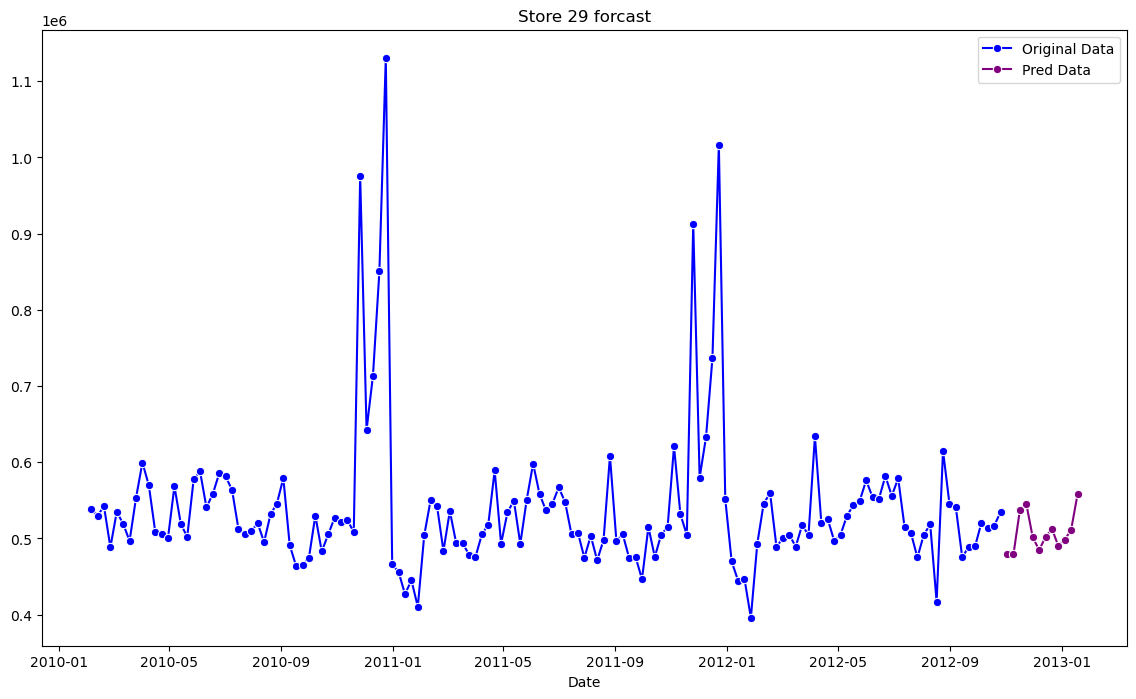

P, D, Q :  0 1 0
Forecast for store 30
 2012-11-02    445166.23
2012-11-09    437639.10
2012-11-16    439584.60
2012-11-23    453420.45
2012-11-30    447853.72
2012-12-07    452061.26
2012-12-14    458179.59
2012-12-21    439697.99
2012-12-28    461039.40
2013-01-04    448881.21
2013-01-11    451825.24
2013-01-18    453712.45
Freq: W-FRI, Name: predicted_mean, dtype: float64


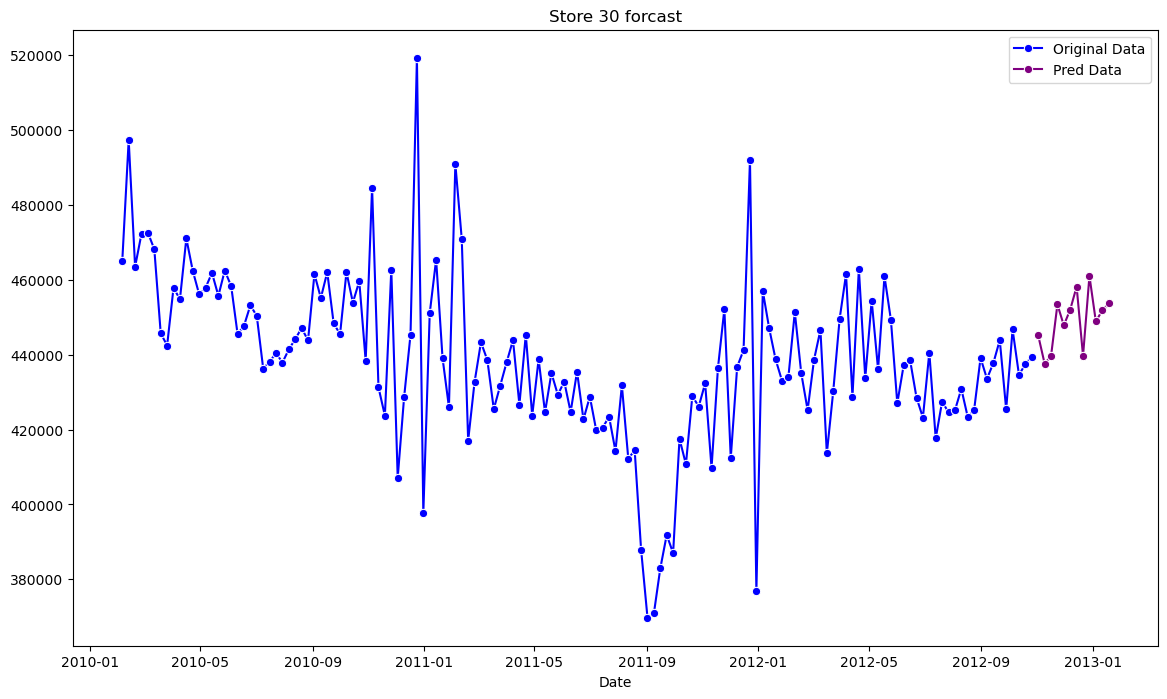

P, D, Q :  2 1 3
Forecast for store 31
 2012-11-02    1.247447e+06
2012-11-09    1.340856e+06
2012-11-16    1.341290e+06
2012-11-23    1.411193e+06
2012-11-30    1.288261e+06
2012-12-07    1.274579e+06
2012-12-14    1.314909e+06
2012-12-21    1.294780e+06
2012-12-28    1.270568e+06
2013-01-04    1.304839e+06
2013-01-11    1.333312e+06
2013-01-18    1.390880e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


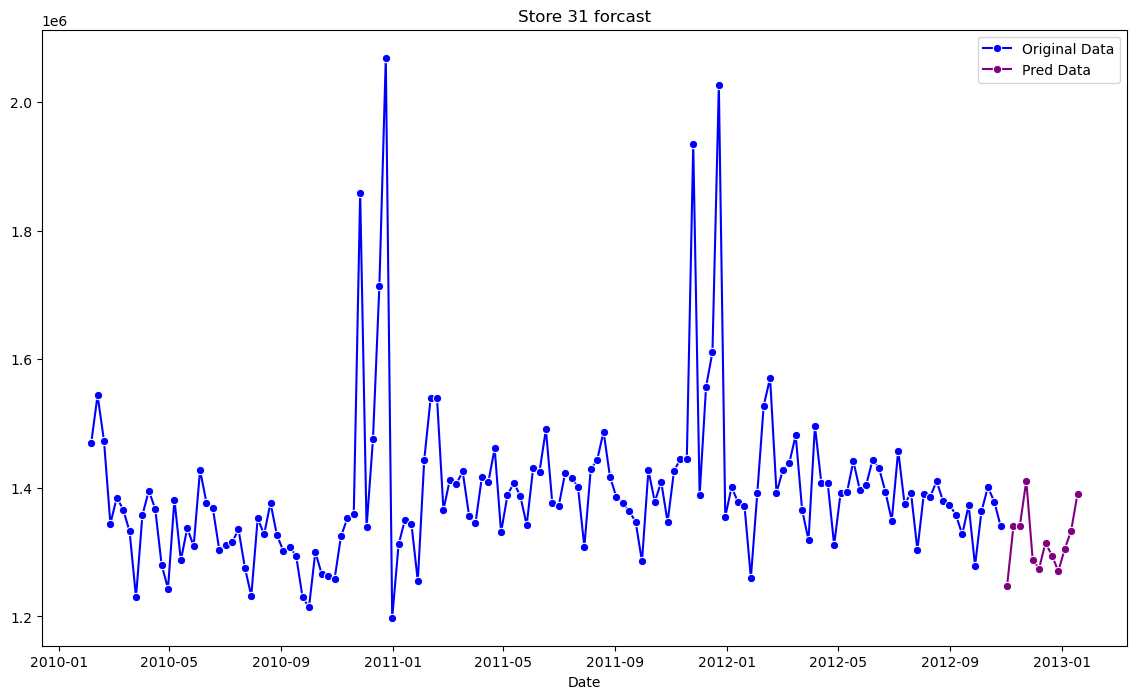

P, D, Q :  3 1 1
Forecast for store 32
 2012-11-02    1.148550e+06
2012-11-09    1.208396e+06
2012-11-16    1.238761e+06
2012-11-23    1.246280e+06
2012-11-30    1.161028e+06
2012-12-07    1.154067e+06
2012-12-14    1.181237e+06
2012-12-21    1.186162e+06
2012-12-28    1.165872e+06
2013-01-04    1.178449e+06
2013-01-11    1.196068e+06
2013-01-18    1.272470e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


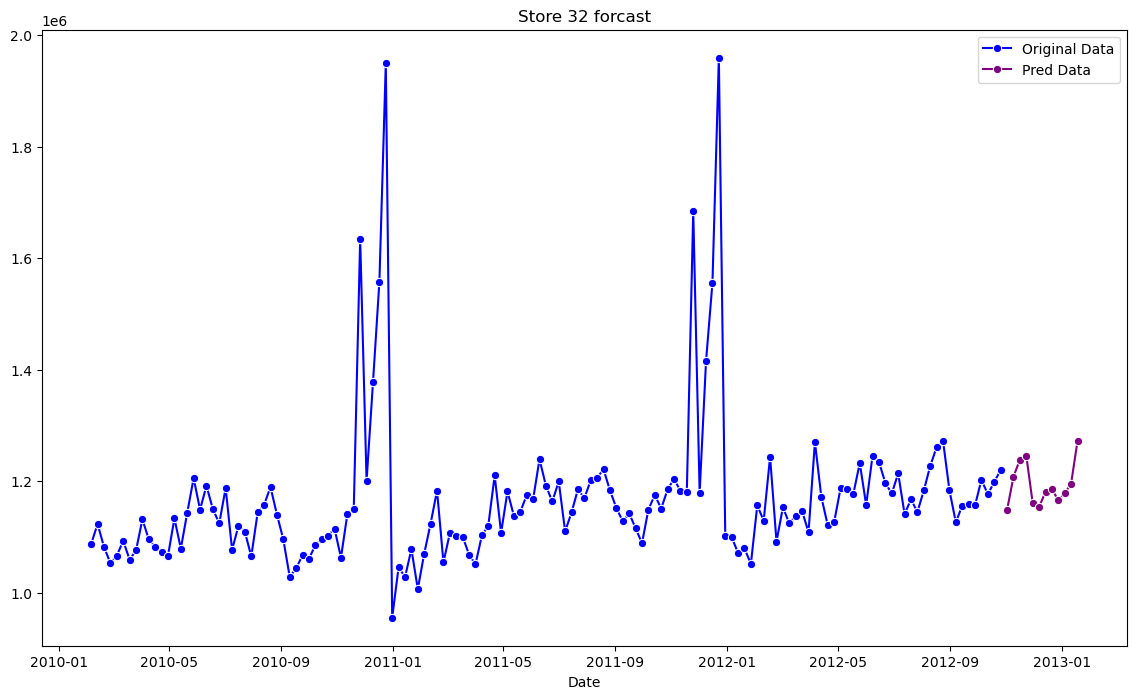

P, D, Q :  0 1 0
Forecast for store 33
 2012-11-02    292951.50
2012-11-09    265295.77
2012-11-16    242870.57
2012-11-23    232327.82
2012-11-30    281626.79
2012-12-07    272615.54
2012-12-14    247907.59
2012-12-21    238011.52
2012-12-28    260642.91
2013-01-04    286979.16
2013-01-11    249610.35
2013-01-18    248929.14
Freq: W-FRI, Name: predicted_mean, dtype: float64


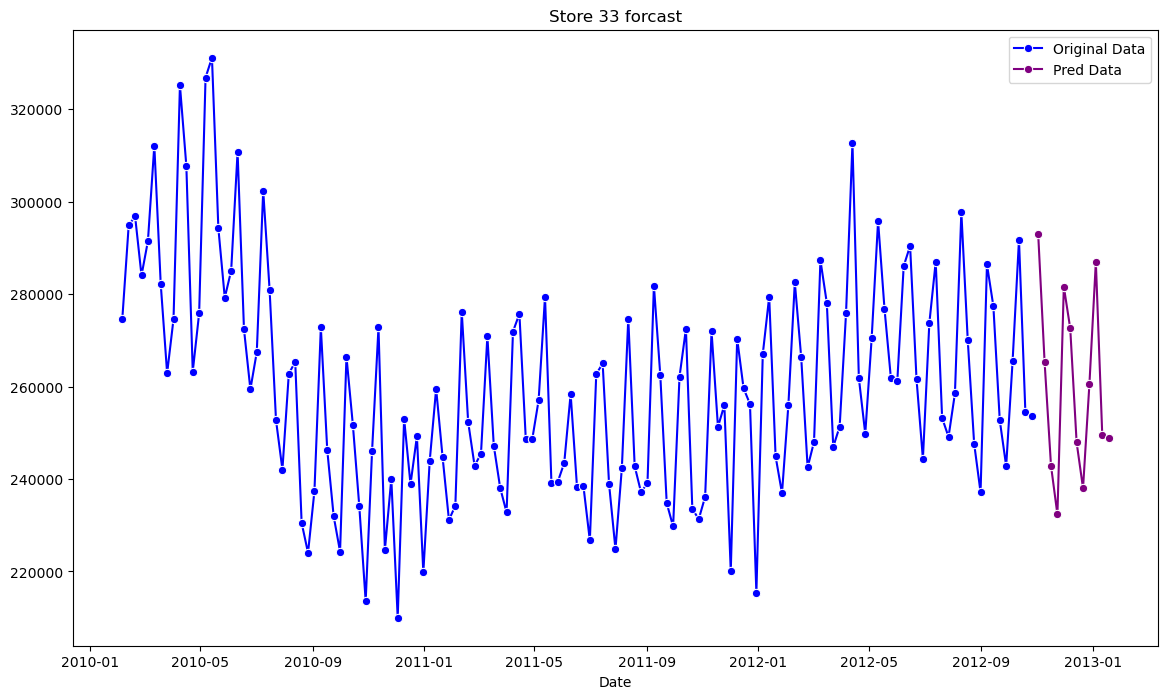

P, D, Q :  2 1 3
Forecast for store 34
 2012-11-02    9.069923e+05
2012-11-09    9.513043e+05
2012-11-16    9.512189e+05
2012-11-23    9.997255e+05
2012-11-30    9.339166e+05
2012-12-07    9.262634e+05
2012-12-14    9.248695e+05
2012-12-21    9.463275e+05
2012-12-28    9.262657e+05
2013-01-04    9.317163e+05
2013-01-11    9.495576e+05
2013-01-18    1.029001e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


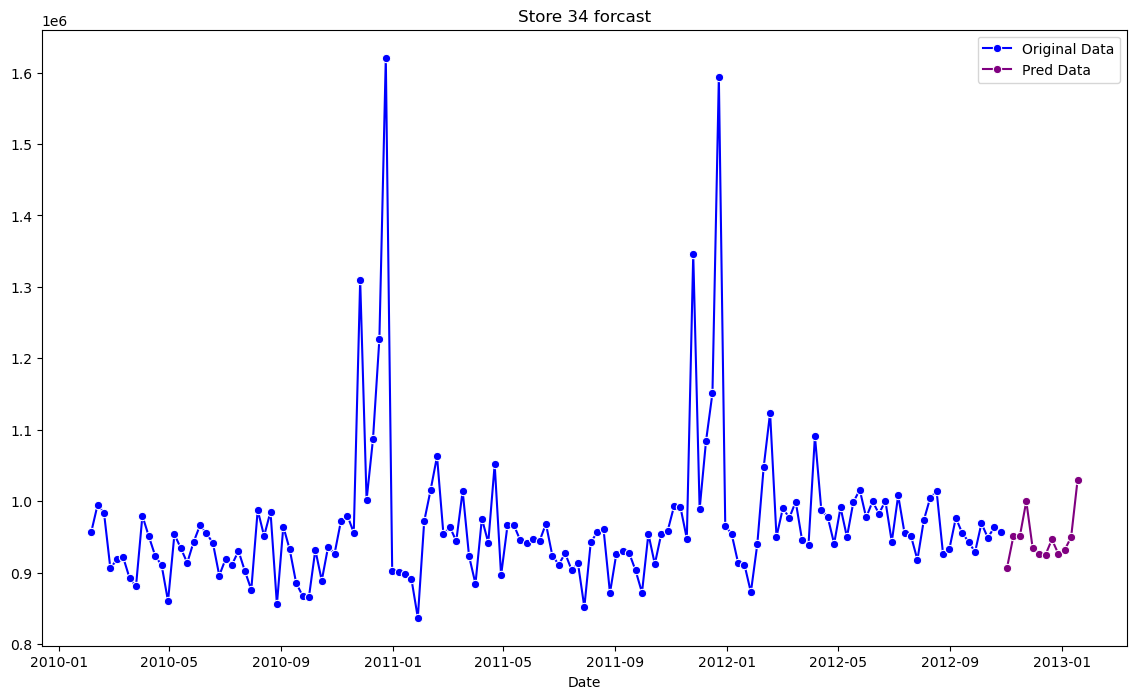

P, D, Q :  4 1 3
Forecast for store 35
 2012-11-02    781529.649318
2012-11-09    800421.621240
2012-11-16    847744.707883
2012-11-23    887550.609510
2012-11-30    834055.100612
2012-12-07    765742.665357
2012-12-14    759868.590546
2012-12-21    810631.546925
2012-12-28    765934.274138
2013-01-04    790017.148661
2013-01-11    807891.477285
2013-01-18    876818.250242
Freq: W-FRI, Name: predicted_mean, dtype: float64


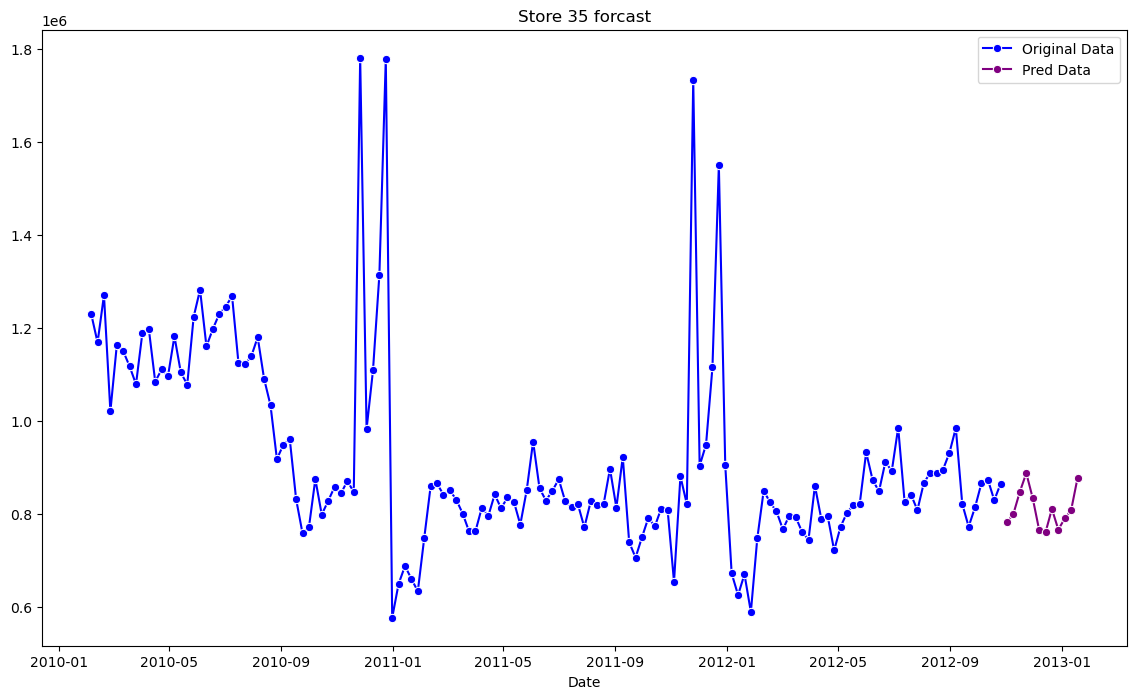

P, D, Q :  0 1 0
Forecast for store 36
 2012-11-02    266446.95
2012-11-09    282106.66
2012-11-16    250044.99
2012-11-23    250146.92
2012-11-30    261228.01
2012-12-07    269393.07
2012-12-14    261303.89
2012-12-21    238177.42
2012-12-28    244637.30
2013-01-04    267736.29
2013-01-11    254859.49
2013-01-18    239988.85
Freq: W-FRI, Name: predicted_mean, dtype: float64


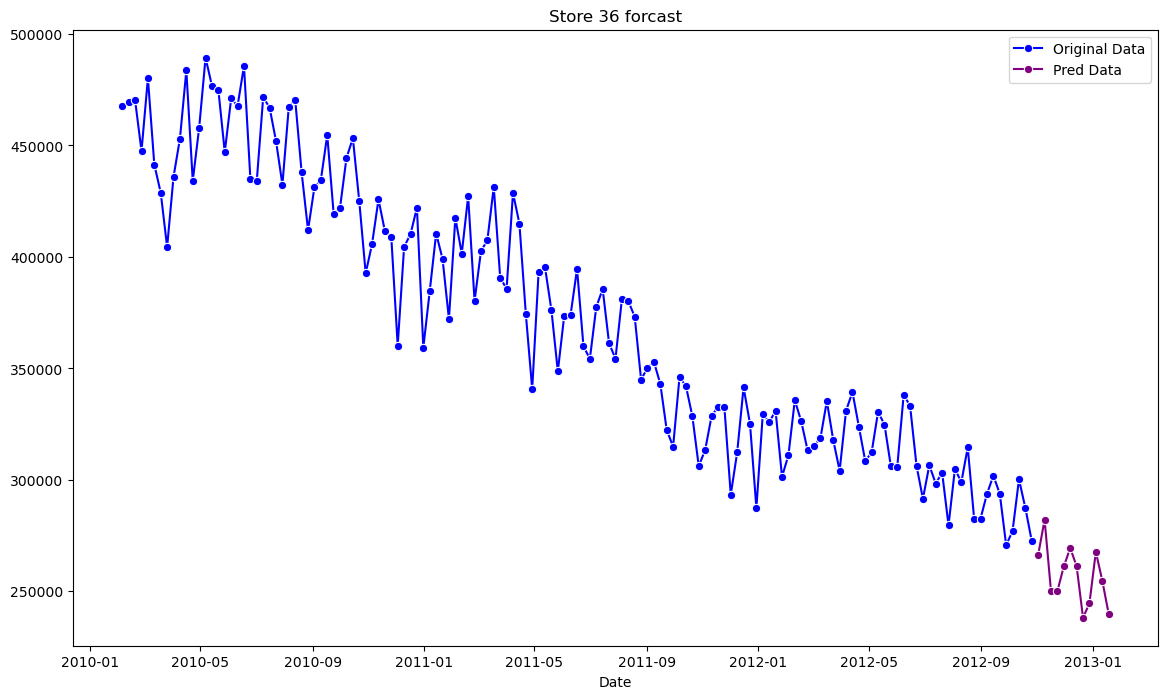

P, D, Q :  1 1 0
Forecast for store 37
 2012-11-02    528628.501301
2012-11-09    533746.921176
2012-11-16    542122.372454
2012-11-23    552601.501937
2012-11-30    538928.538738
2012-12-07    523478.846563
2012-12-14    534745.774202
2012-12-21    542556.123877
2012-12-28    552493.565818
2013-01-04    533915.703115
2013-01-11    559025.509584
2013-01-18    548218.579470
Freq: W-FRI, Name: predicted_mean, dtype: float64


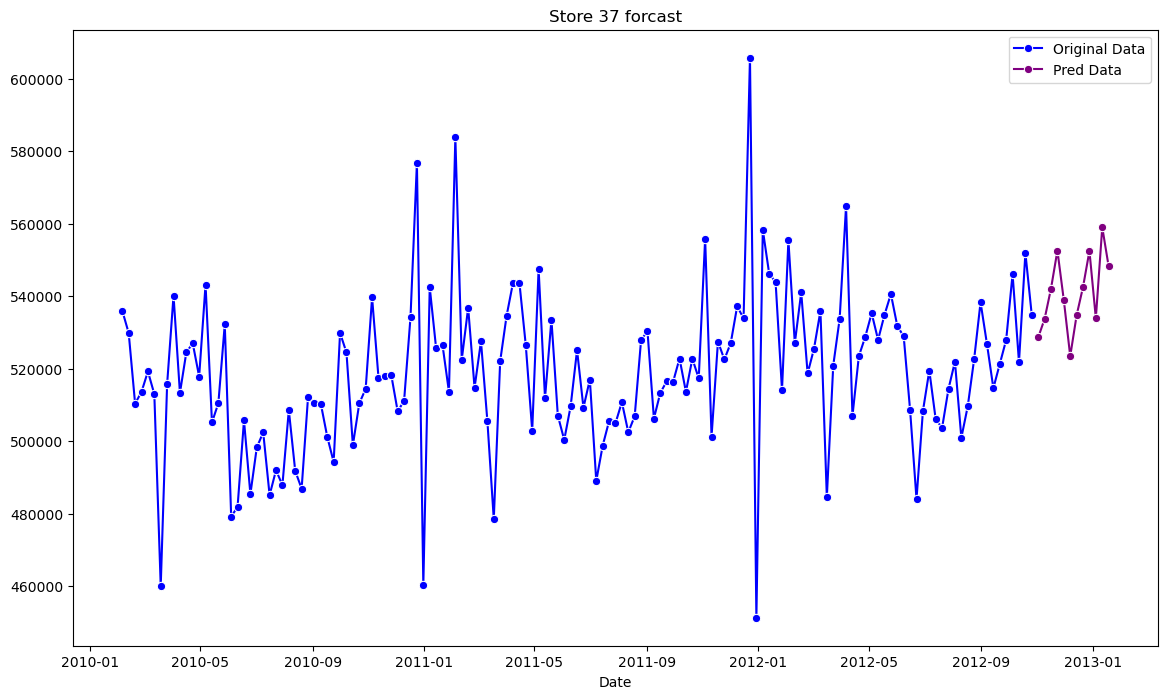

P, D, Q :  2 1 2
Forecast for store 38
 2012-11-02    413218.957737
2012-11-09    441375.603104
2012-11-16    437734.437602
2012-11-23    445241.839373
2012-11-30    454304.876137
2012-12-07    448624.269768
2012-12-14    440374.247449
2012-12-21    446411.674848
2012-12-28    450038.668536
2013-01-04    454702.539894
2013-01-11    448689.000381
2013-01-18    449875.571650
Freq: W-FRI, Name: predicted_mean, dtype: float64


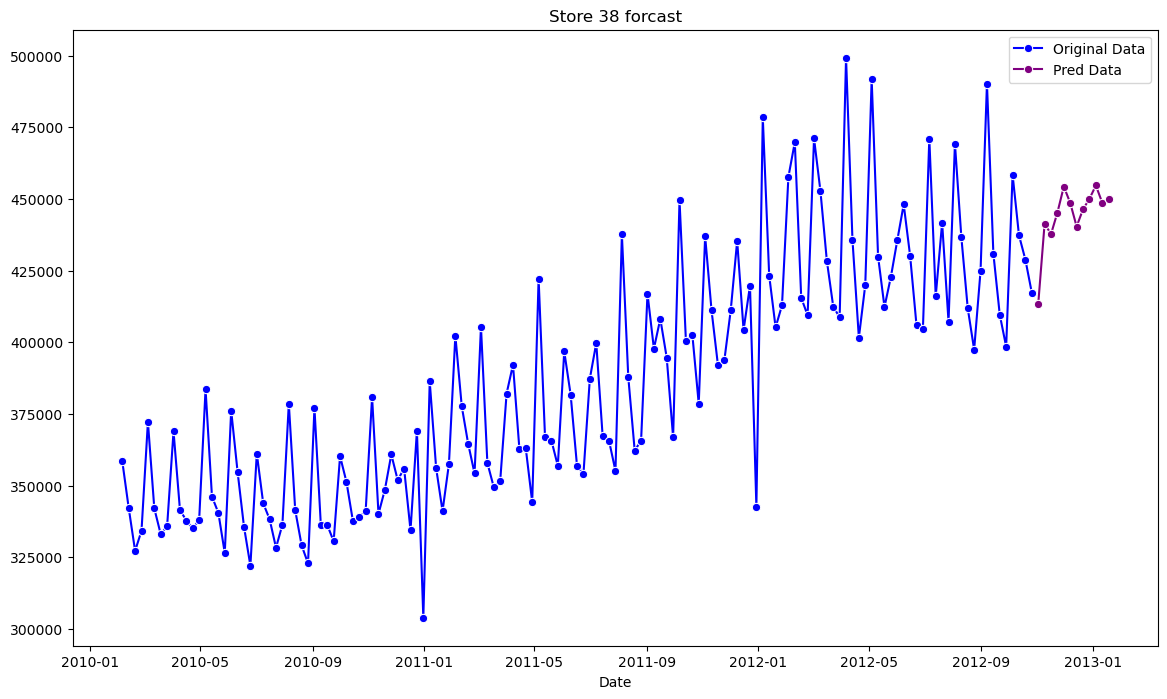

P, D, Q :  5 1 1
Forecast for store 39
 2012-11-02    1.561083e+06
2012-11-09    1.551096e+06
2012-11-16    1.640725e+06
2012-11-23    1.636782e+06
2012-11-30    1.592271e+06
2012-12-07    1.506624e+06
2012-12-14    1.593772e+06
2012-12-21    1.582953e+06
2012-12-28    1.543925e+06
2013-01-04    1.545709e+06
2013-01-11    1.590325e+06
2013-01-18    1.637748e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


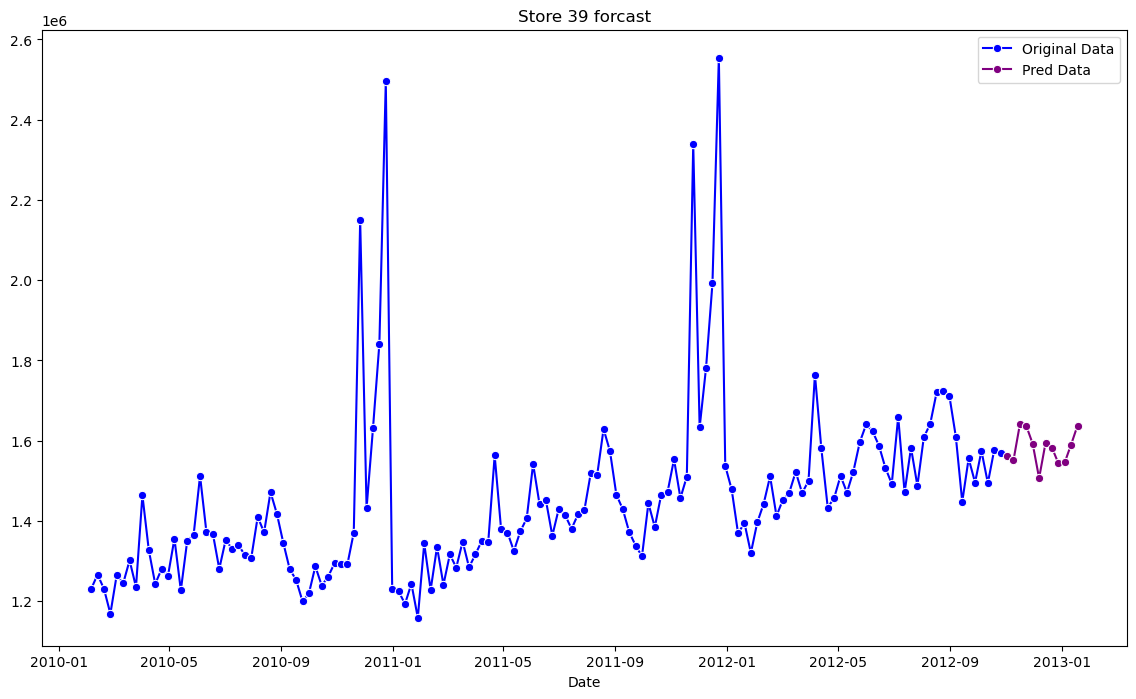

P, D, Q :  1 1 3
Forecast for store 40
 2012-11-02    8.938436e+05
2012-11-09    9.362773e+05
2012-11-16    9.707095e+05
2012-11-23    1.017490e+06
2012-11-30    9.468764e+05
2012-12-07    9.143567e+05
2012-12-14    9.189975e+05
2012-12-21    9.445203e+05
2012-12-28    9.339753e+05
2013-01-04    9.419058e+05
2013-01-11    9.331162e+05
2013-01-18    9.758207e+05
Freq: W-FRI, Name: predicted_mean, dtype: float64


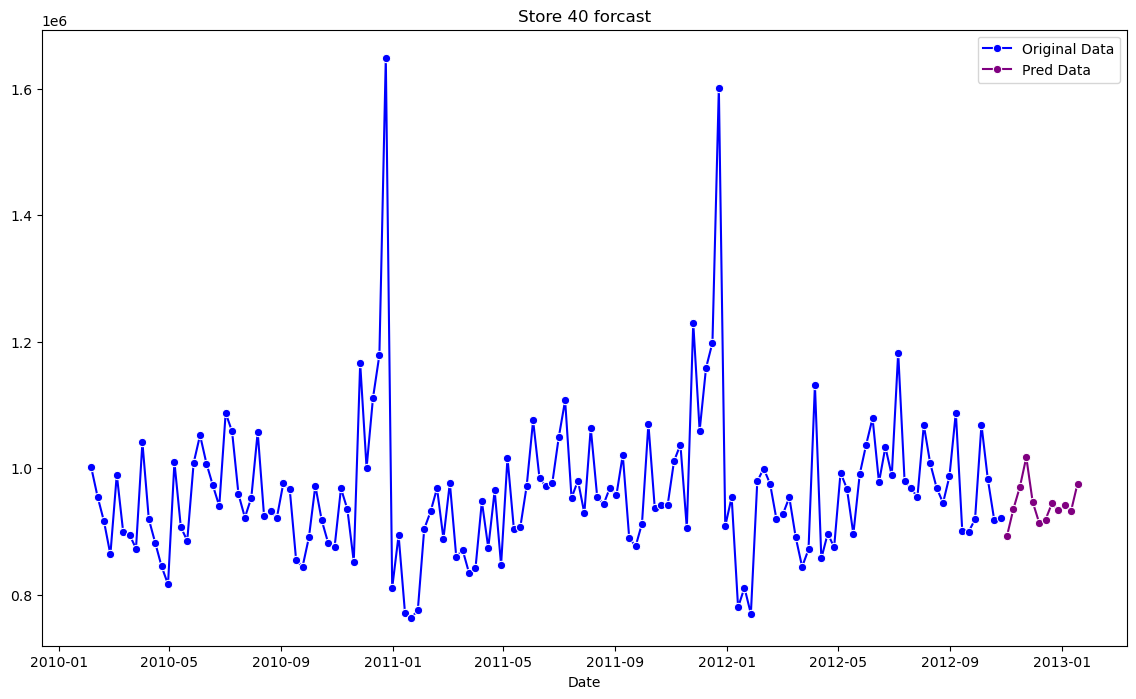

P, D, Q :  4 1 3
Forecast for store 41
 2012-11-02    1.252271e+06
2012-11-09    1.342983e+06
2012-11-16    1.337619e+06
2012-11-23    1.383748e+06
2012-11-30    1.308572e+06
2012-12-07    1.279180e+06
2012-12-14    1.275295e+06
2012-12-21    1.359272e+06
2012-12-28    1.289337e+06
2013-01-04    1.338884e+06
2013-01-11    1.331898e+06
2013-01-18    1.506532e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


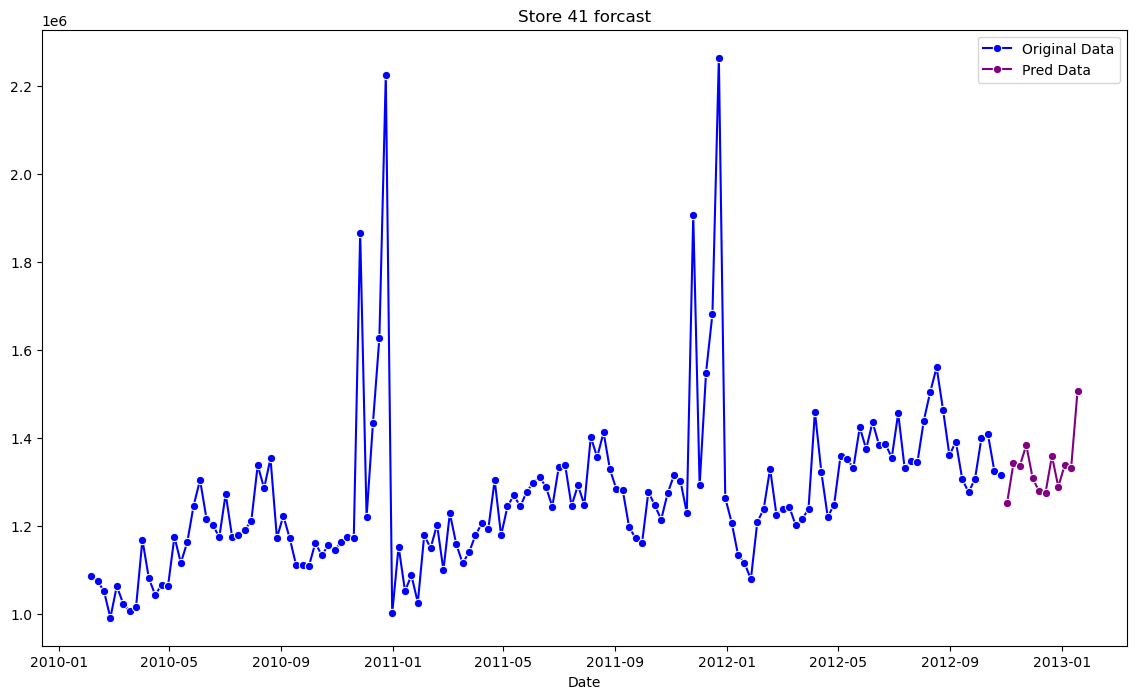

P, D, Q :  1 1 5
Forecast for store 42
 2012-11-02    514116.392315
2012-11-09    588096.619662
2012-11-16    549338.055305
2012-11-23    525294.718526
2012-11-30    522212.891514
2012-12-07    568486.552358
2012-12-14    566025.121900
2012-12-21    541764.245383
2012-12-28    549634.621745
2013-01-04    557873.138092
2013-01-11    572833.408996
2013-01-18    550877.091266
Freq: W-FRI, Name: predicted_mean, dtype: float64


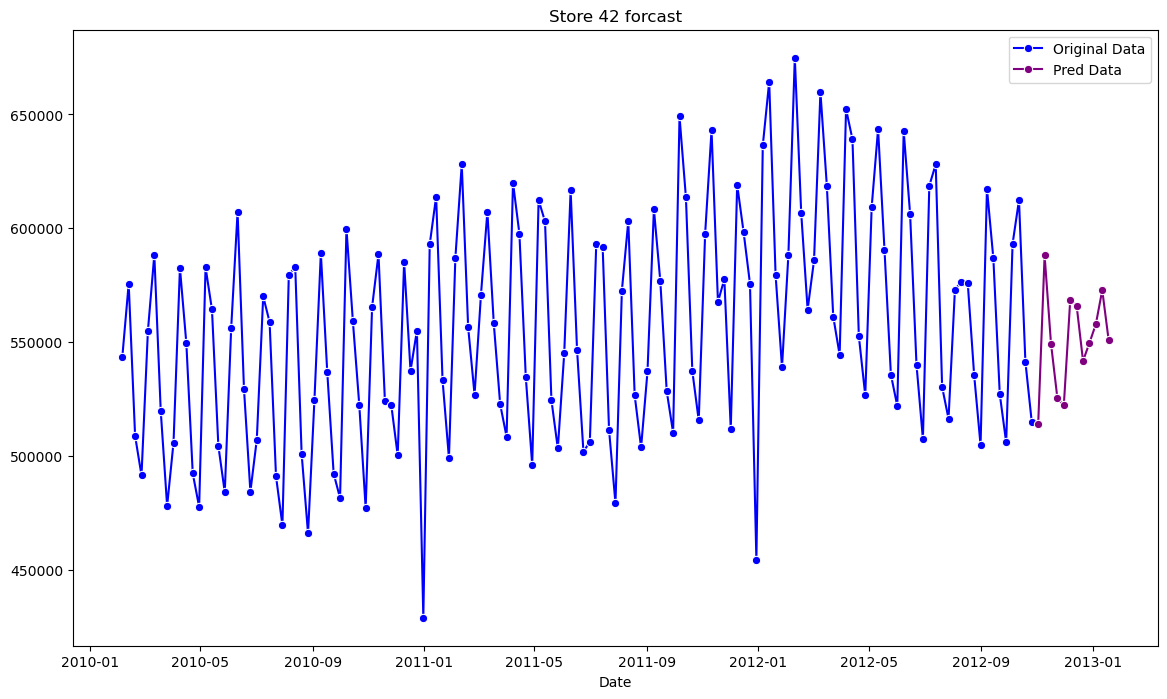

P, D, Q :  2 1 0
Forecast for store 43
 2012-11-02    613870.550509
2012-11-09    628271.163244
2012-11-16    585687.509289
2012-11-23    595337.869295
2012-11-30    625659.992104
2012-12-07    601228.765012
2012-12-14    591812.482926
2012-12-21    588201.407627
2012-12-28    617543.453255
2013-01-04    587948.118901
2013-01-11    596745.623275
2013-01-18    582795.369089
Freq: W-FRI, Name: predicted_mean, dtype: float64


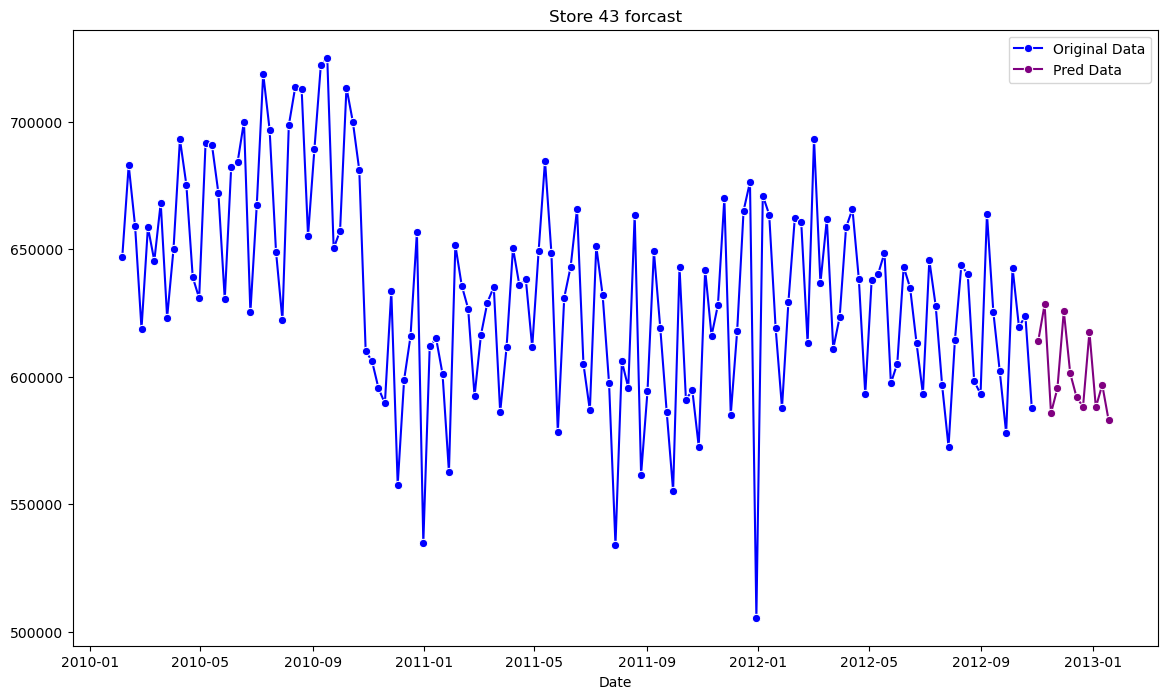

P, D, Q :  1 1 1
Forecast for store 44
 2012-11-02    343302.242312
2012-11-09    357313.143454
2012-11-16    362221.095295
2012-11-23    366680.002461
2012-11-30    357964.457584
2012-12-07    367574.740163
2012-12-14    362833.308233
2012-12-21    373710.642421
2012-12-28    362136.275911
2013-01-04    365218.487946
2013-01-11    358537.812175
2013-01-18    379721.273726
Freq: W-FRI, Name: predicted_mean, dtype: float64


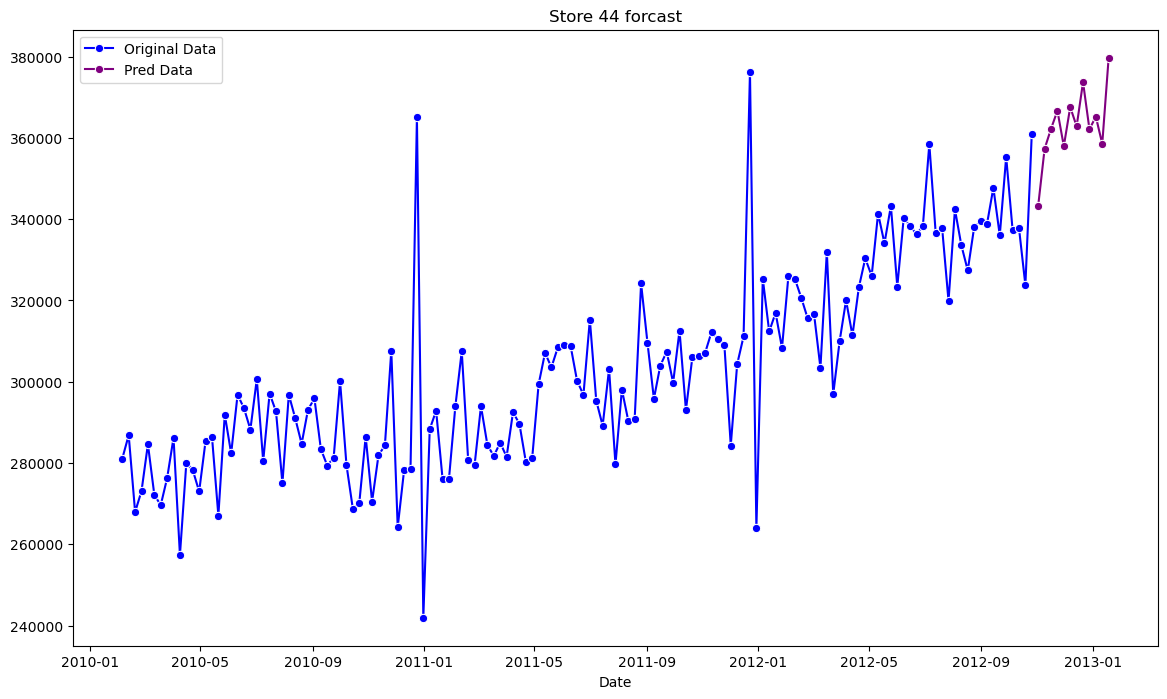

P, D, Q :  0 1 1
Forecast for store 45
 2012-11-02    688176.597321
2012-11-09    718259.002812
2012-11-16    731686.779429
2012-11-23    777689.691893
2012-11-30    722934.063724
2012-12-07    697391.720422
2012-12-14    708281.953970
2012-12-21    730854.228915
2012-12-28    692023.483530
2013-01-04    706420.497783
2013-01-11    722185.259439
2013-01-18    781408.547967
Freq: W-FRI, Name: predicted_mean, dtype: float64


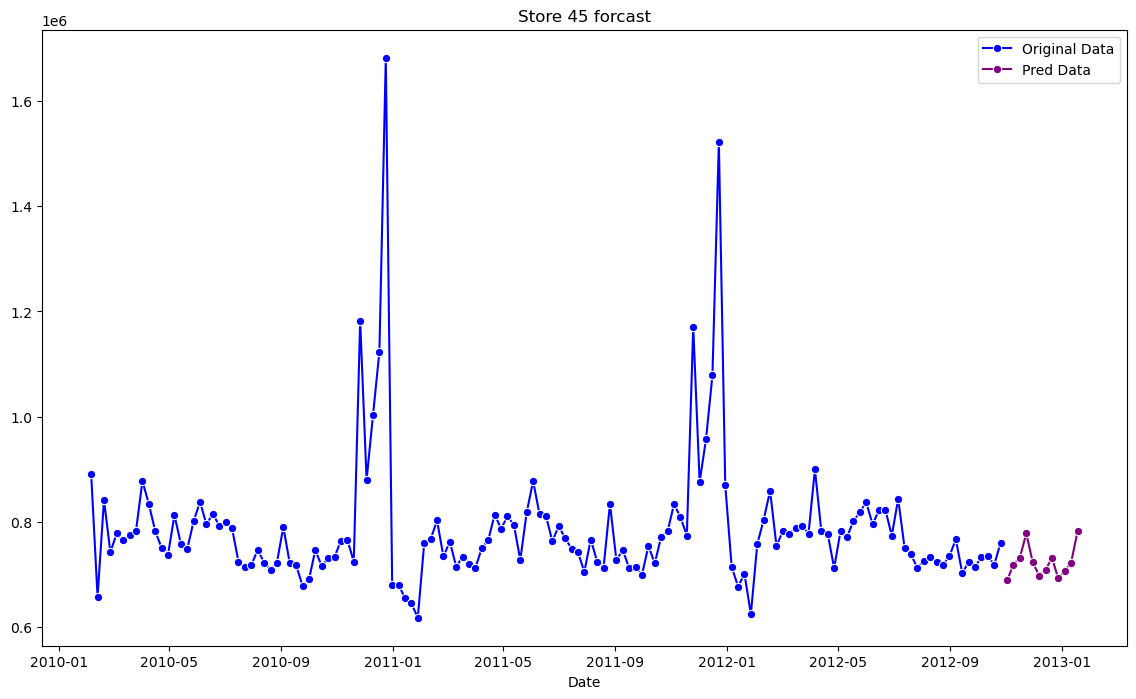

In [172]:
# Running for loop to store each store data in store_df dataframe and run the auto_arima with all hyperparameters adjusted for better results.
for store in walmart_df_req_col['Store'].unique():
    store_df = walmart_df_req_col[walmart_df_req_col['Store'] == store]['Weekly_Sales']
    
    auto_arima = pmd.auto_arima(store_df, seasonal=True,
                      start_p=1, start_q=1, max_p=5, max_q=5, 
                      d=1, D=1, max_d=2, max_D=2, 
                      stepwise=True,  n_jobs=-1)
    p = auto_arima.order[0]
    d = auto_arima.order[1]
    q = auto_arima.order[2]
    
    print('P, D, Q : ',p,d,q)
    sarima = SARIMAX(store_df, order=(p,d,q), seasonal_order=(p,d,q,12))
    sarima = sarima.fit()
    sarima_pred = sarima.forecast(steps=12)
    print(f'Forecast for store {store}\n',sarima_pred)
    
    plt.figure(figsize=(14,8))
    sns.lineplot(data = store_df,x=store_df.index,y=store_df.values,color='blue',marker='o',label = 'Original Data')
    sns.lineplot(data = sarima_pred,x=sarima_pred.index,y=sarima_pred.values,color='purple',marker='o',label = 'Pred Data')
    plt.title(f'Store {store} forcast')
    plt.show()